In [33]:
import statsmodels
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotnine as p
from matplotlib.pyplot import figure
import plotnine as p
from plotnine.data import diamonds

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [120]:
#read altent space inferred with 5k highly variable genes
latent_df=pd.read_csv('latent120_ren5khgv.csv', index_col=0)
latent_df.head()

,0,1,2,3,4,5,6,7,8,9
d01_sample_A_AACAGGGGTCGGATTT,0.548462,-1.227112,0.567296,2.123562,0.305532,-1.337764,0.453397,-0.470497,0.264413,-0.567089
d01_sample_A_AACCAACGTCCGAAAG,0.651528,-3.746501,1.078396,-0.474421,0.896719,-0.739009,1.521099,0.510465,0.204490,0.871304
d01_sample_A_AACCTTTGTAGCACGA,0.997486,-1.813750,0.560962,-0.440036,0.824470,-1.550216,-0.300738,-0.075581,0.525643,-0.218799
d01_sample_A_AAGCATCTCTATCGCC,0.759327,-1.571379,0.459058,1.456399,-0.059965,-1.380938,0.654153,0.194317,0.444083,0.385683
d01_sample_A_AATCACGGTCATAAAG,0.801189,-1.575191,0.546774,-0.873911,0.762989,-1.592086,-0.226112,-0.363935,-0.101191,-0.507104


In [4]:
obs=pd.read_csv('obs_wrangled_ren2021.csv', index_col=0)
obs['age']=obs.agestr
obs

/home/edaveiga/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.


,patient,batch,city,sex,sample_type,severity,sample_point,sample_day,infected,outcome,cell_type,patient_num,agestr,age_untied,patunique,patnum,agerank
d01_sample_A_AACAGGGGTCGGATTT,P-S070,Batch01,Zhuhai,F,frozen PBMC,severe/critical,progression,7,positive,discharged,Mono,173,32,32.0174,P-S070-F32-s,174,37
d01_sample_A_AACCAACGTCCGAAAG,P-S070,Batch01,Zhuhai,F,frozen PBMC,severe/critical,progression,7,positive,discharged,B,173,32,32.0174,P-S070-F32-s,174,37
d01_sample_A_AACCTTTGTAGCACGA,P-S070,Batch01,Zhuhai,F,frozen PBMC,severe/critical,progression,7,positive,discharged,B,173,32,32.0174,P-S070-F32-s,174,37
d01_sample_A_AAGCATCTCTATCGCC,P-S070,Batch01,Zhuhai,F,frozen PBMC,severe/critical,progression,7,positive,discharged,Mono,173,32,32.0174,P-S070-F32-s,174,37
d01_sample_A_AATCACGGTCATAAAG,P-S070,Batch01,Zhuhai,F,frozen PBMC,severe/critical,progression,7,positive,discharged,B,173,32,32.0174,P-S070-F32-s,174,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d17_9_TTTGTCATCCACGCAG,P-S053,Batch17,Beijing,F,frozen PBMC,severe/critical,progression,9,positive,discharged,Mega,156,46,46.0157,P-S053-F46-s,157,86
d17_9_TTTGTCATCCGCTGTT,P-S053,Batch17,Beijing,F,frozen PBMC,severe/critical,progression,9,positive,discharged,Plasma,156,46,46.0157,P-S053-F46-s,157,86
d17_9_TTTGTCATCGTCGTTC,P-S053,Batch17,Beijing,F,frozen PBMC,severe/critical,progression,9,positive,discharged,CD8,156,46,46.0157,P-S053-F46-s,157,86
d17_9_TTTGTCATCTGTACGA,P-S053,Batch17,Beijing,F,frozen PBMC,severe/critical,progression,9,positive,discharged,NK,156,46,46.0157,P-S053-F46-s,157,86


# test statsmodels linear regression

In [310]:
X = latent_df.values
X = sm.add_constant(X)
y=obs['age']

In [311]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9545.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:34:09   Log-Likelihood:            -6.1858e+06
No. Observations:             1462702   AIC:                         1.237e+07
Df Residuals:                 1462691   BIC:                         1.237e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.1839      0.014   3494.253      0.0

In [380]:
describe

,count,mean,std,min,25%,50%,75%,max
patnum,,,,,,,,
0,933.0,50.711255,2.569299,42.084515,49.140407,50.818242,52.334054,61.642439
1,1148.0,51.425427,2.581898,43.264095,49.741788,51.398488,53.102922,60.041434
2,485.0,49.974630,2.827628,42.243173,48.103768,49.781431,51.883198,58.372277
3,648.0,50.132037,2.672611,41.744070,48.366530,50.337488,52.005065,57.324869
4,907.0,47.114412,2.462526,40.259786,45.443895,46.917665,48.491005,59.387897
...,...,...,...,...,...,...,...,...
192,1251.0,51.151248,5.283575,39.724033,46.815880,51.610717,54.748691,66.579200
193,1362.0,52.824536,4.789720,40.597287,49.074541,54.046011,55.771736,66.768342
194,591.0,56.905908,6.030913,38.802396,54.713241,56.853740,59.928681,71.354158


In [398]:
ddf.patnum

d03_HC3_AAACCTGTCGACCAGC      14
d03_HC3_AAAGCAACAATCTGCA      14
d03_HC3_AACCATGAGTCGCCGT      14
d03_HC3_AACTCAGAGCCTCGTG      14
d03_HC3_AACTCAGAGGAGTACC      14
                              ..
d13_YH191_TTTACTGTCCTTGACC     4
d13_YH191_TTTATGCAGGTGGGTT     4
d13_YH191_TTTATGCCAGTTCATG     4
d13_YH191_TTTATGCTCATATCGG     4
d13_YH191_TTTGTCAAGAGCTTCT     4
Name: patnum, Length: 917, dtype: int64

In [437]:
# define plotting function, stratify groups by sex and condition (severe/mild/controls)
def ageplot(df=df, alpha=0.1, title=' Age plot', size=(20,7),dpi=120):
    fig=plt.figure(figsize=size, dpi=dpi)
    
    ax = plt.gca()
    colorslist = ['forestgreen','darkblue','blue','yellowgreen','cyan','lime','red','purple','pink','orange']
    dfages = df[['agerank', 'age']].drop_duplicates()
    colorcounter=0
    describe_full=df[['patnum','pred_ages']].groupby('patnum').describe()['pred_ages']
    for condition in df.conditions.unique():
        color=colorslist[colorcounter]
        ddf=df[df['conditions']==condition]
        describe = describe_full[describe_full.index.isin(ddf.patnum)]
#         ax.scatter(ddf['agerank'], ddf['pred_ages'],  alpha = alpha, s = 10, label=condition, edgecolors='none', color=color)
        ax.scatter(describe.index,describe['mean'], color=color, marker='.', label =  condition)
#         ax.scatter(describe.index,describe['25%'], color=color, marker='^',  s=3)
#         ax.scatter(describe.index,describe['75%'], color=color, marker='v',  s=3)
        for idx, row in describe.iterrows():
            ax.vlines(x=idx , ymin=row['25%'], ymax=row['75%'], color=color)
#             print(idx)
#             print(row)
        colorcounter+=1
    ax.scatter(dfages['agerank'],dfages['age'], color='k', marker='_', label = 'True age')

    
    ax.set_xlim((1,220))
    ax.set_ylim((0,100))
    ax.set_ylabel('Age')
    ax.set_ylabel('Patients ranked by age')
    ax.axes.xaxis.set_visible(False)
    
    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    plt.grid('True', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.show()


Plotting...


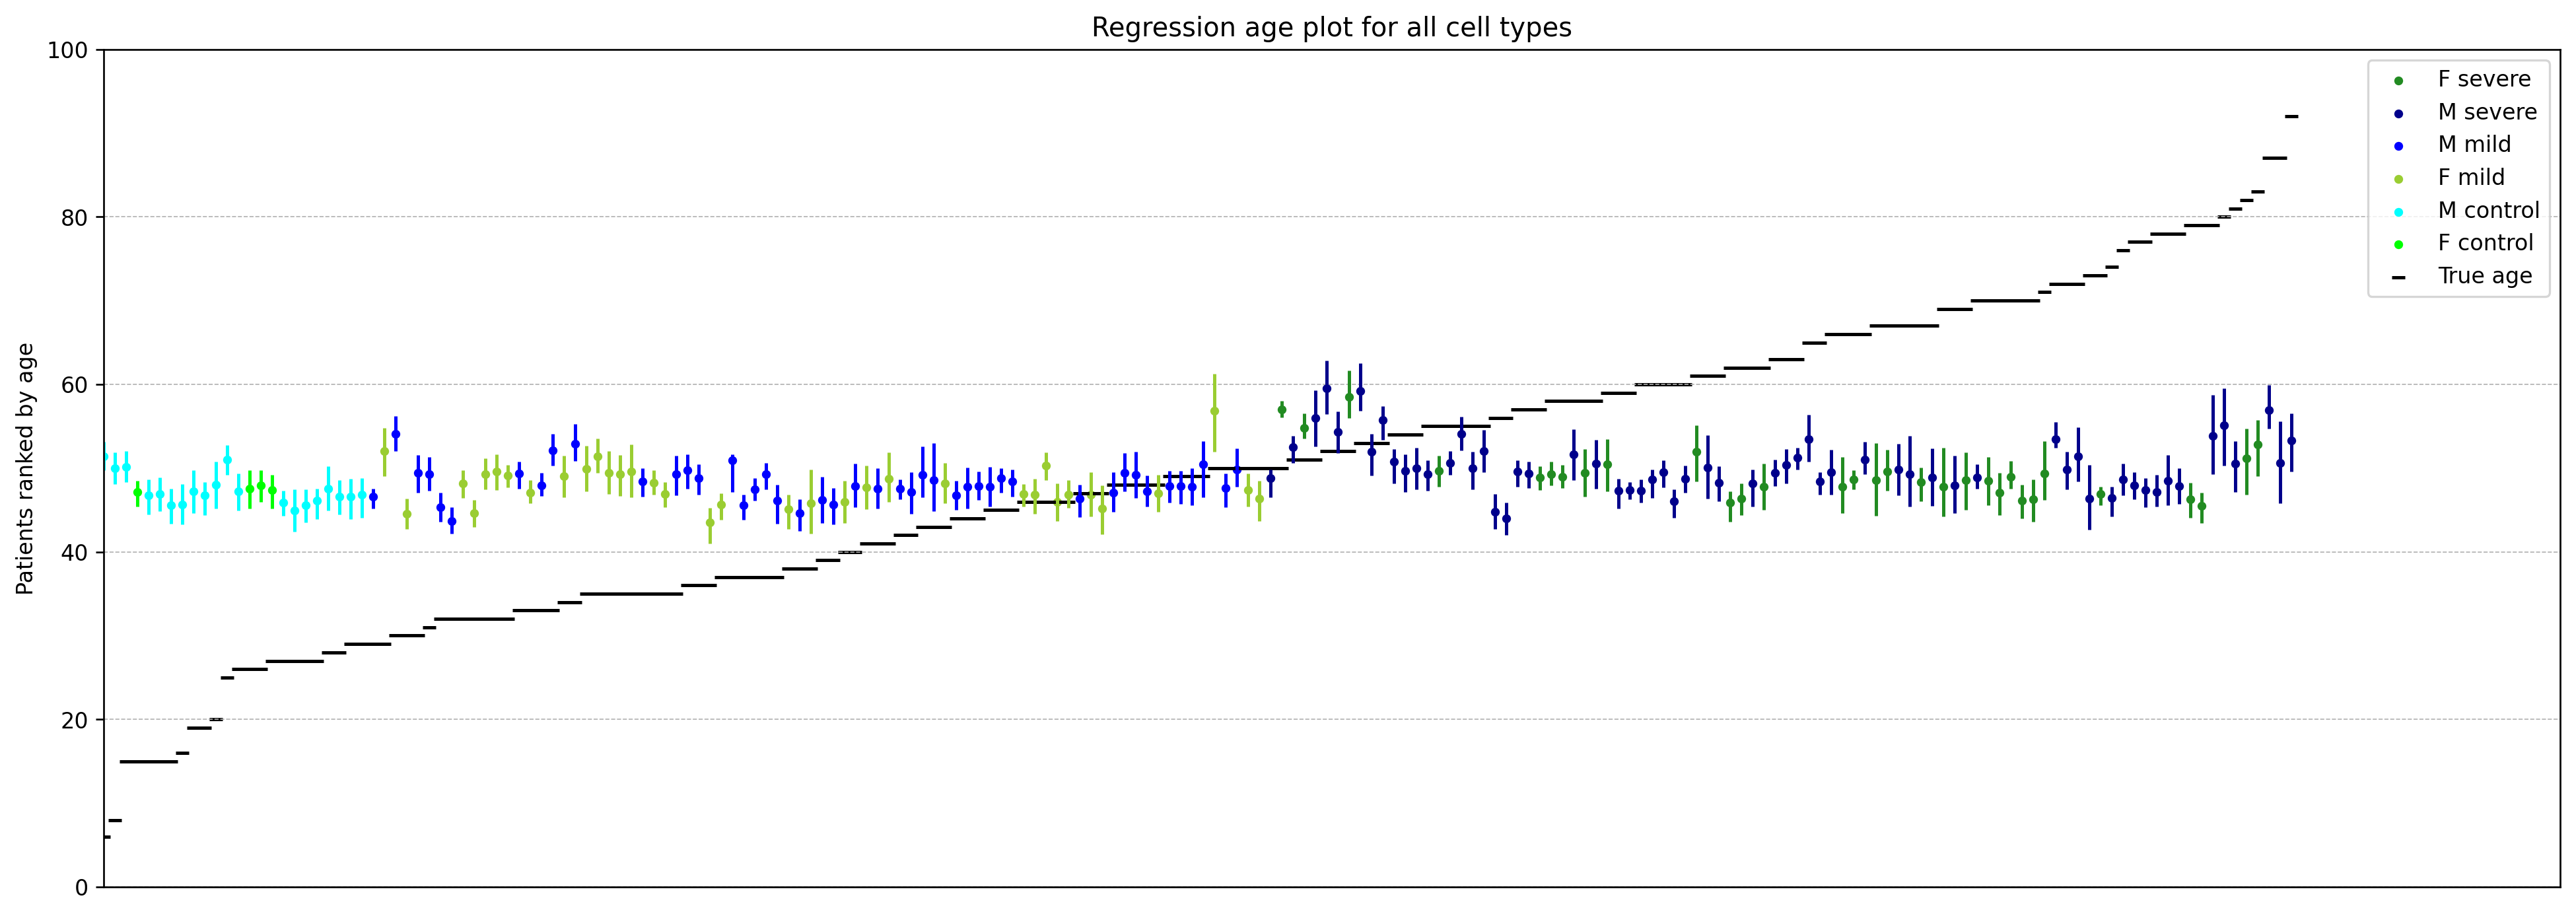

In [434]:

describe=df[['patnum','pred_ages']].groupby('patnum').describe()['pred_ages']

print('Plotting...')
ageplot(df=df, alpha = 0.01, title = 'Regression age plot for all cell types')

# Regression statified per cell type 
The data contains the following cell types:
['Mono', 'B', 'Macro', 'CD4', 'CD8', 'NK', 'DC', 'Mega', 'Neu',
       'Plasma', 'Epi', 'Mast']
       
Can some of them make better predictors than others?

We try training the model on the matrix restricted to the relevant cell type

Doing regression for cell type... Mono
number of cells:  294788
number of patients:  196


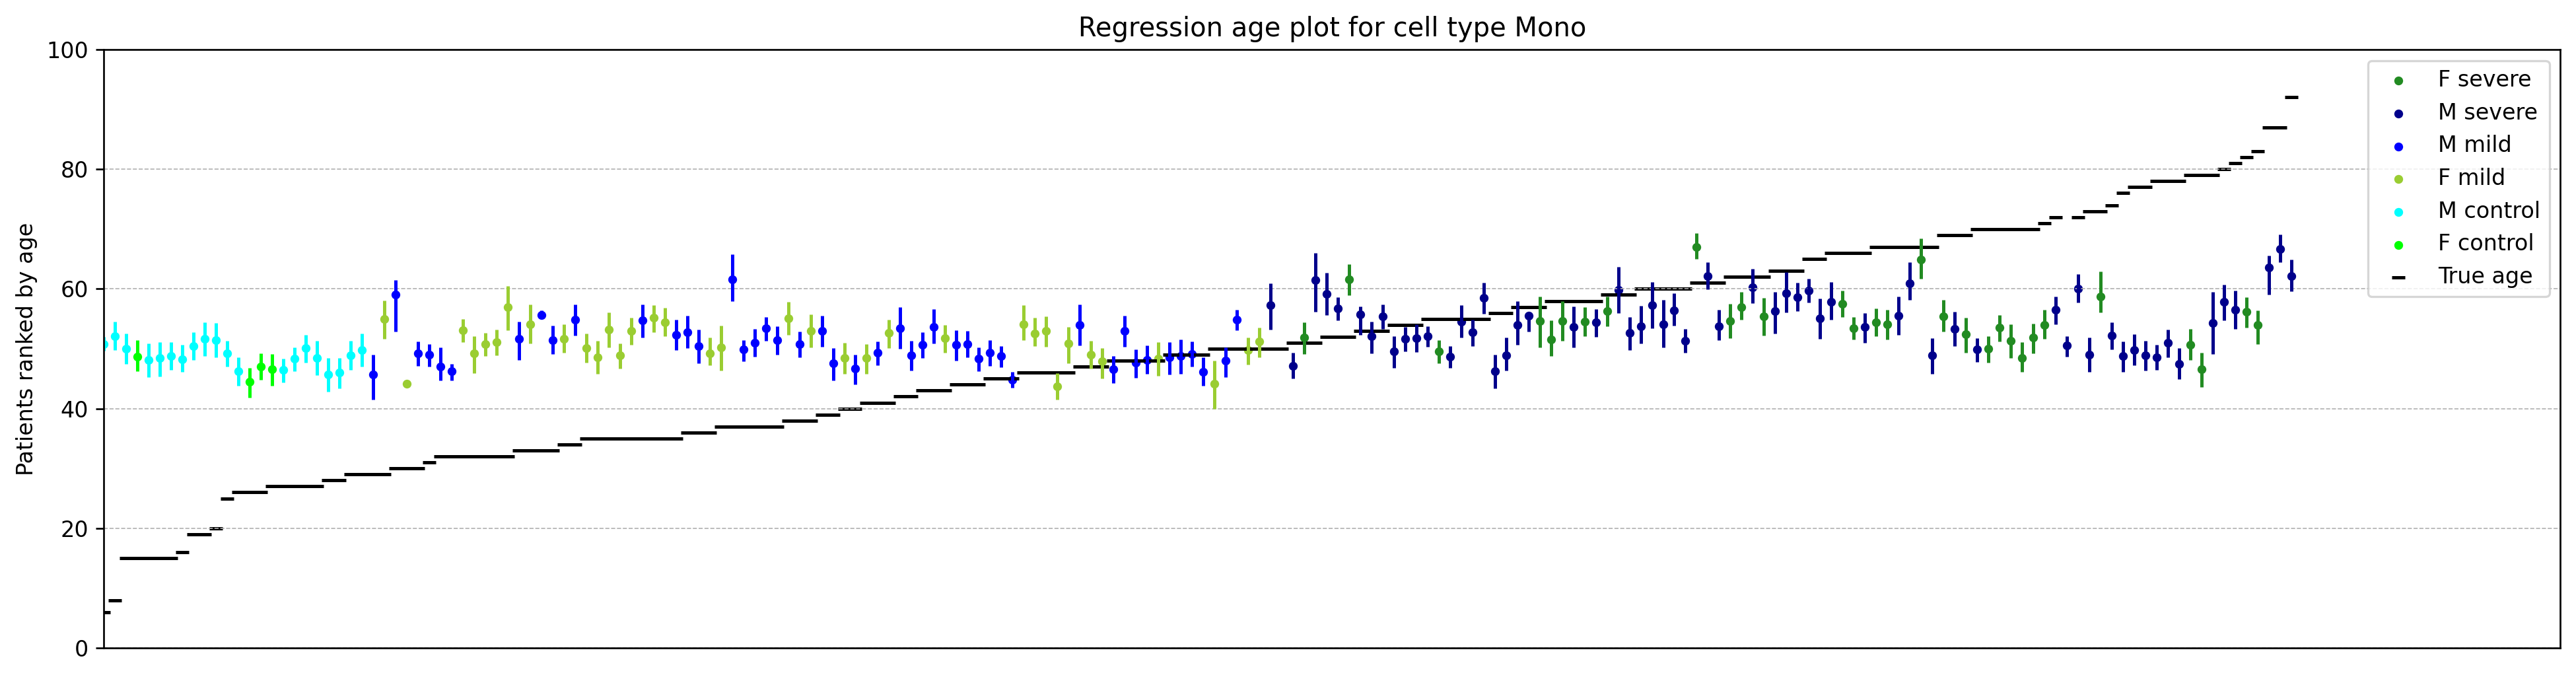

Doing regression for cell type... B
number of cells:  403700
number of patients:  197


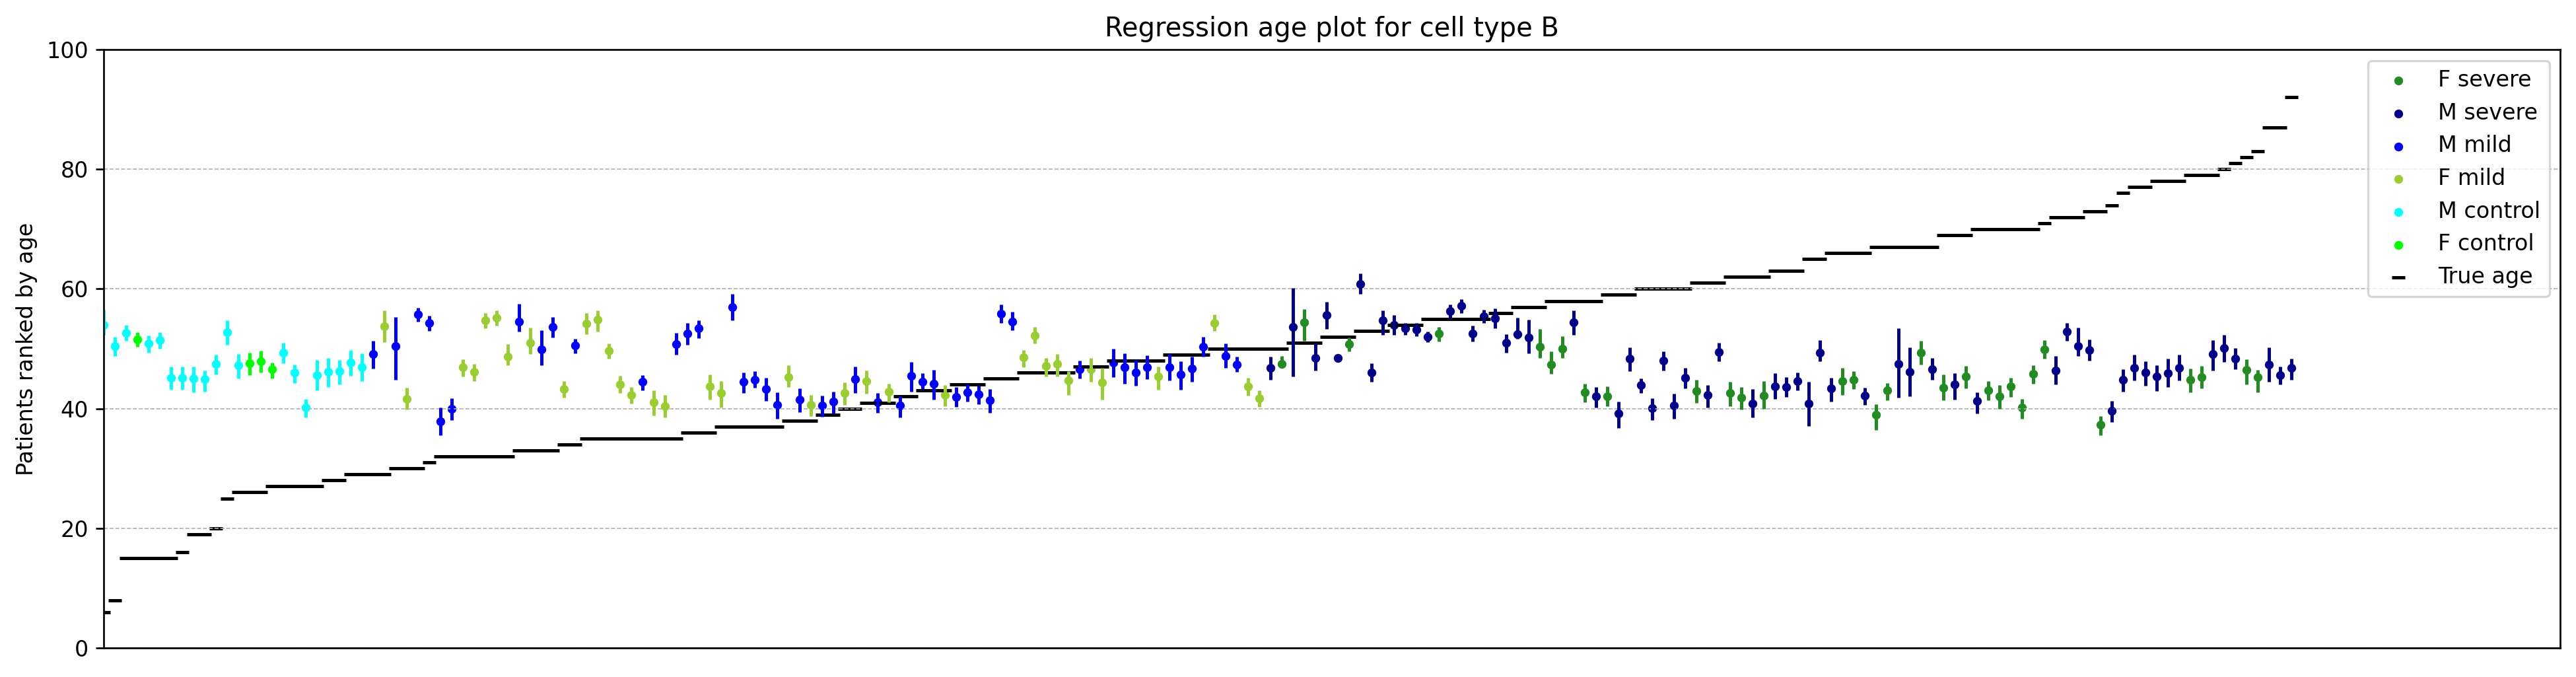

Doing regression for cell type... Macro
number of cells:  21471
number of patients:  124


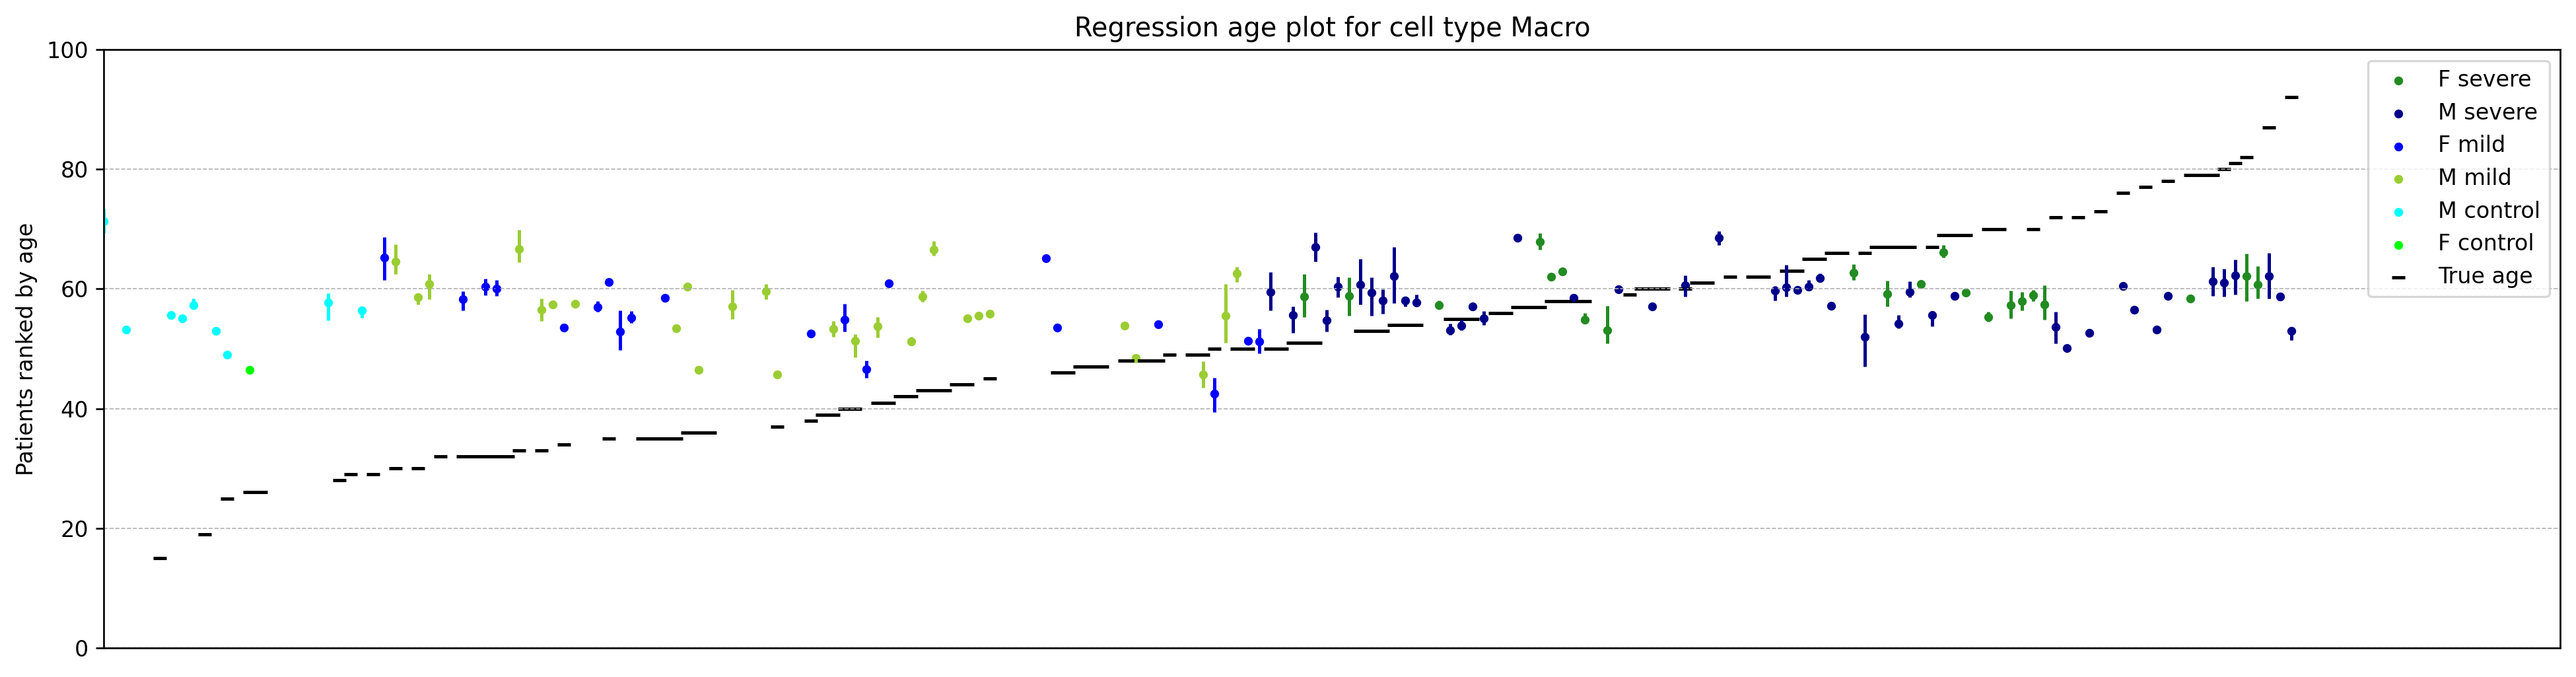

Doing regression for cell type... CD4
number of cells:  260141
number of patients:  196


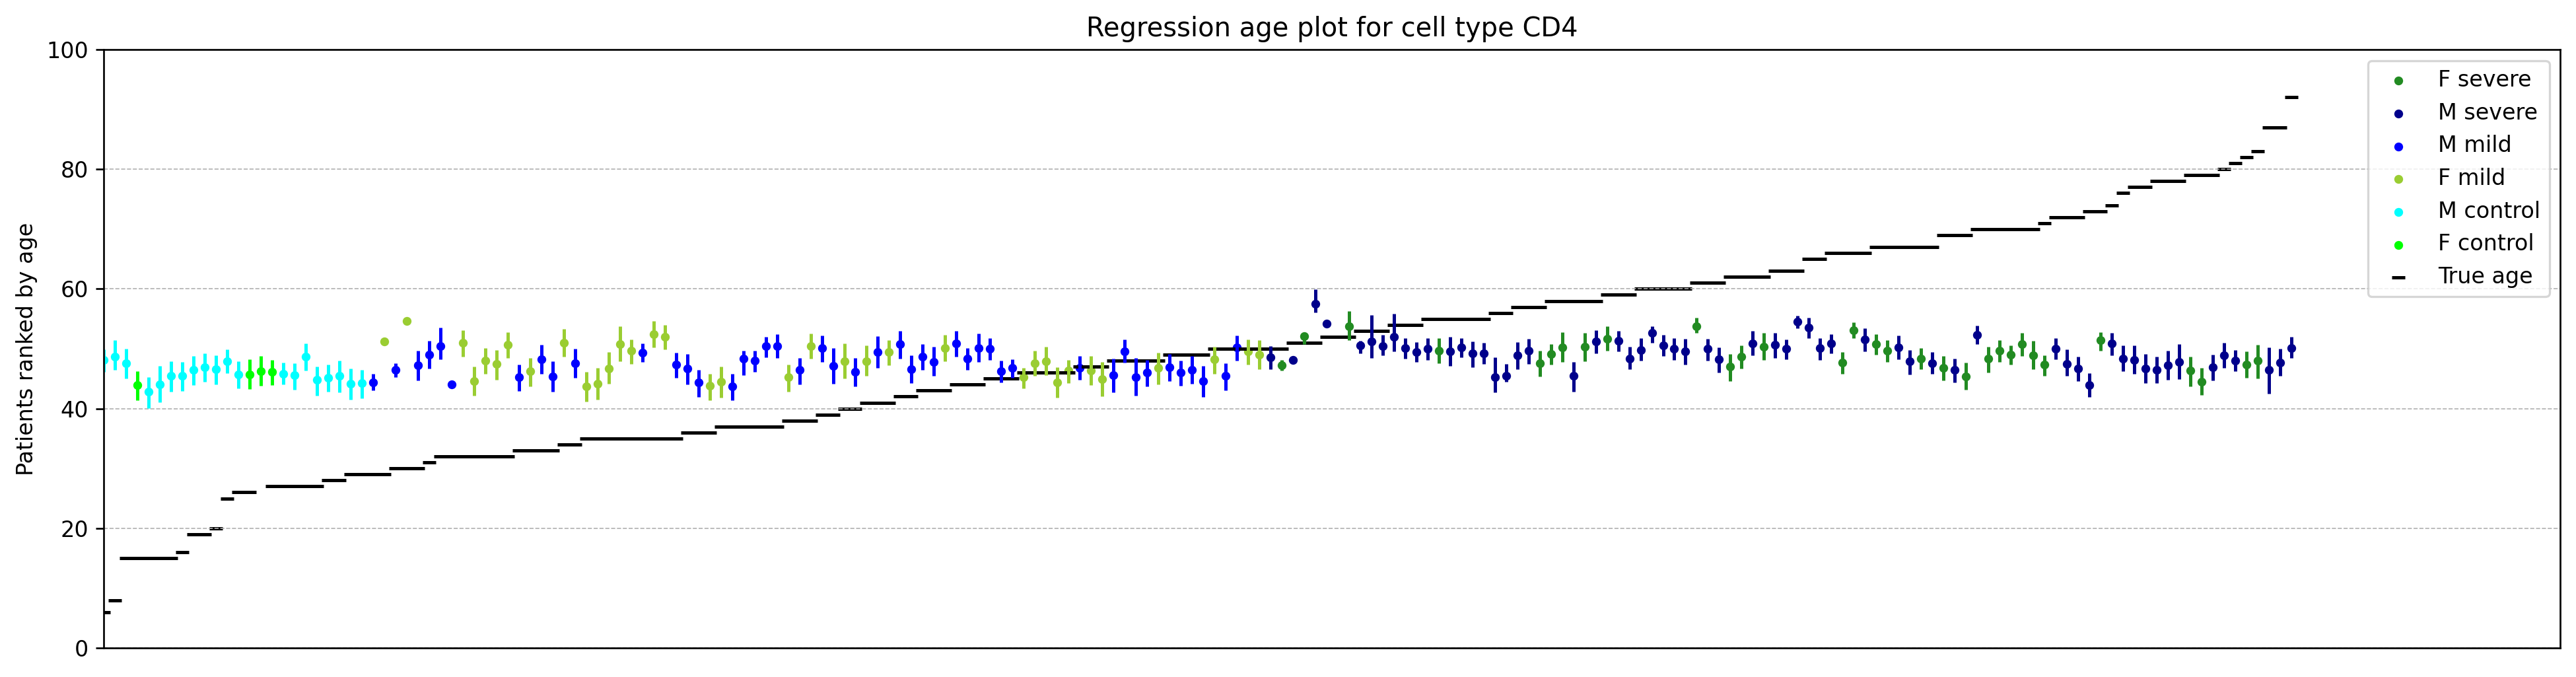

Doing regression for cell type... CD8
number of cells:  374454
number of patients:  197


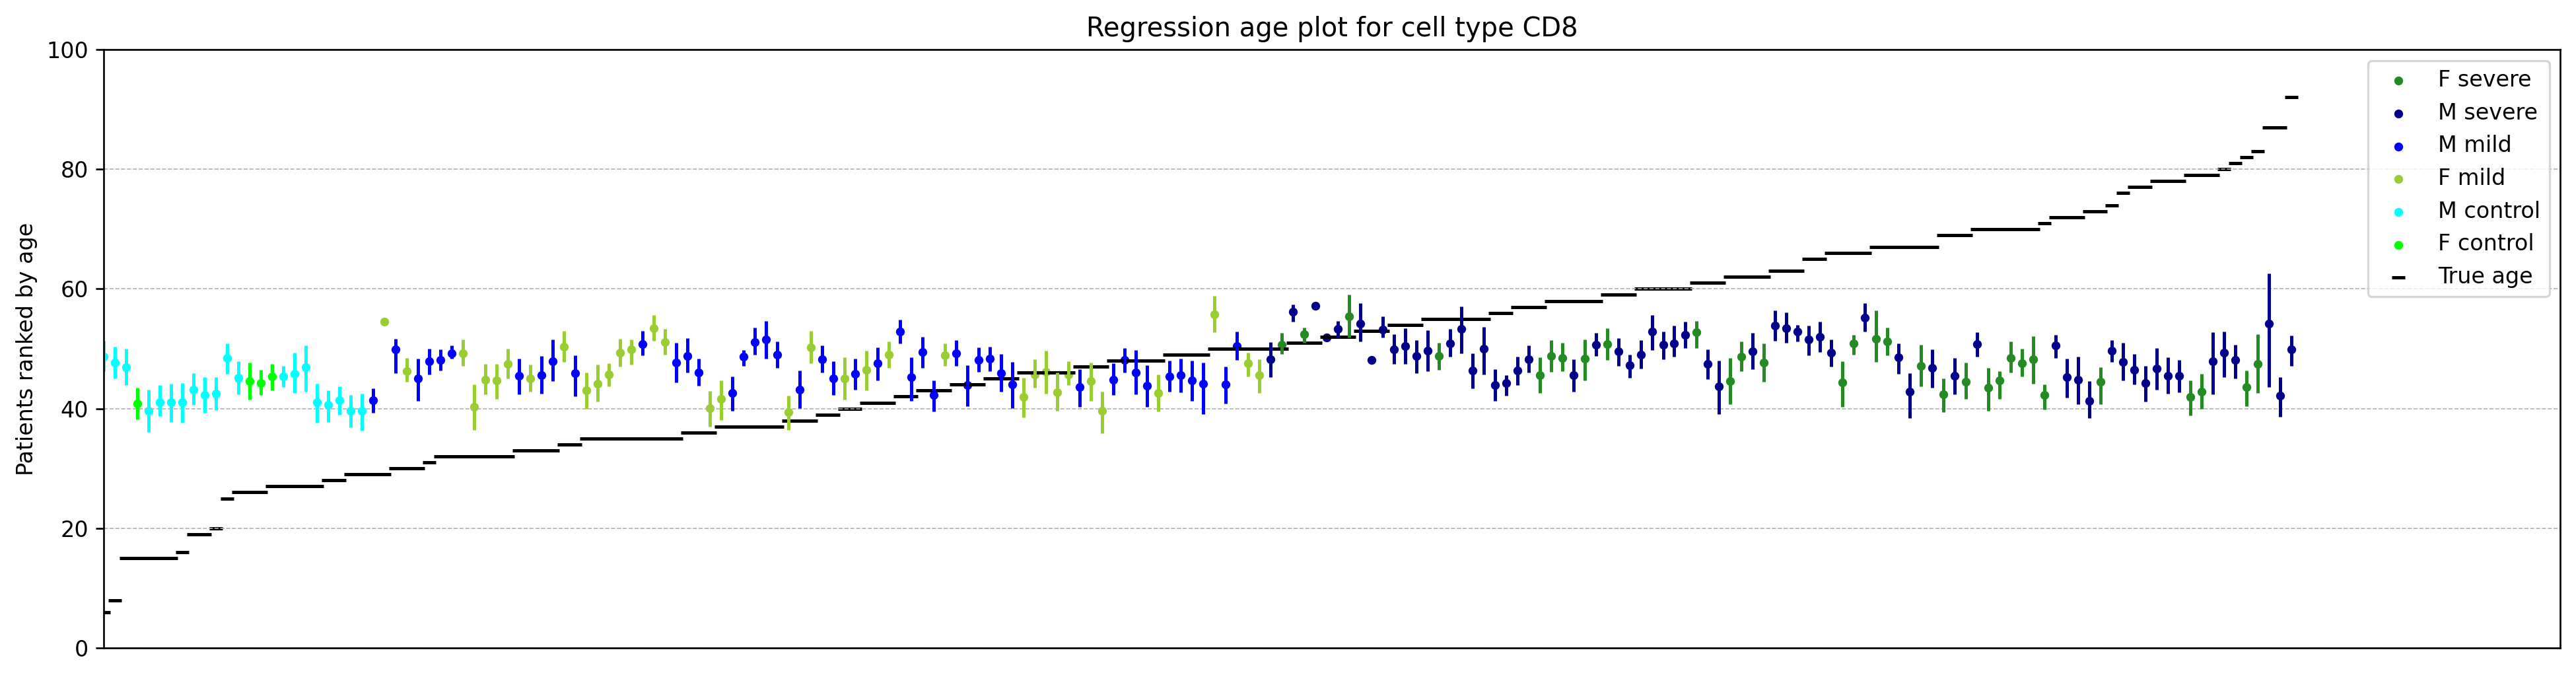

Doing regression for cell type... NK
number of cells:  59062
number of patients:  194


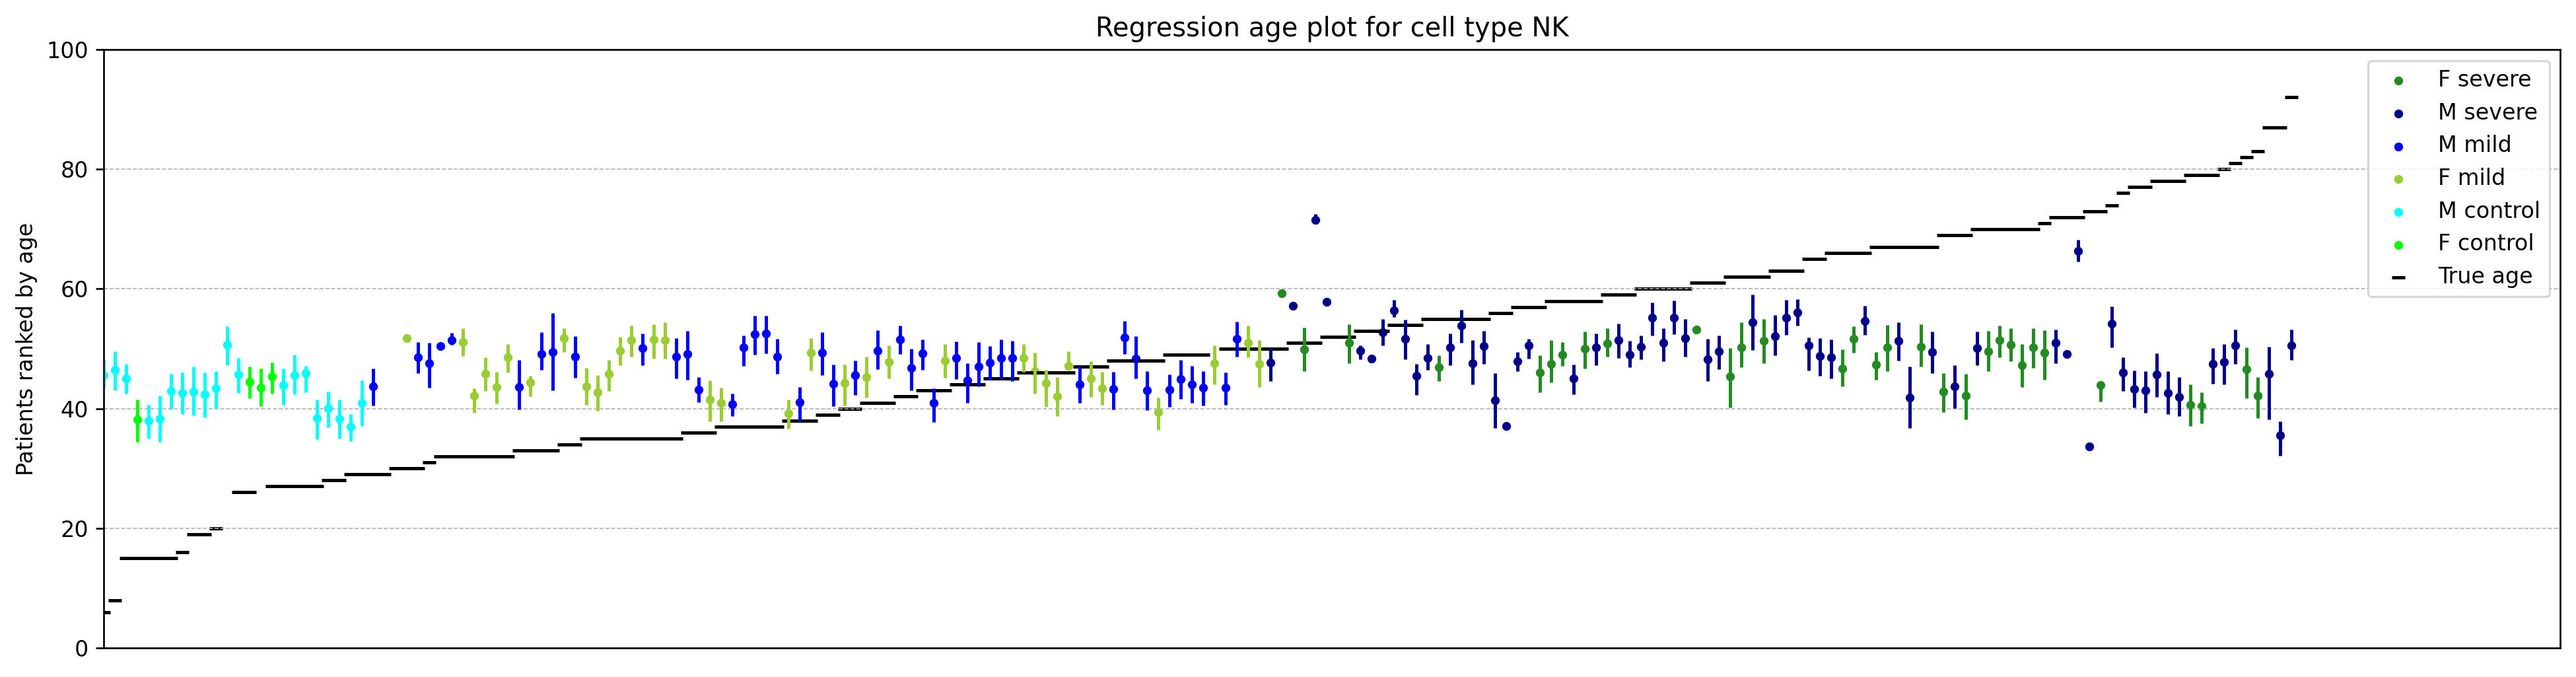

Doing regression for cell type... DC
number of cells:  13684
number of patients:  192


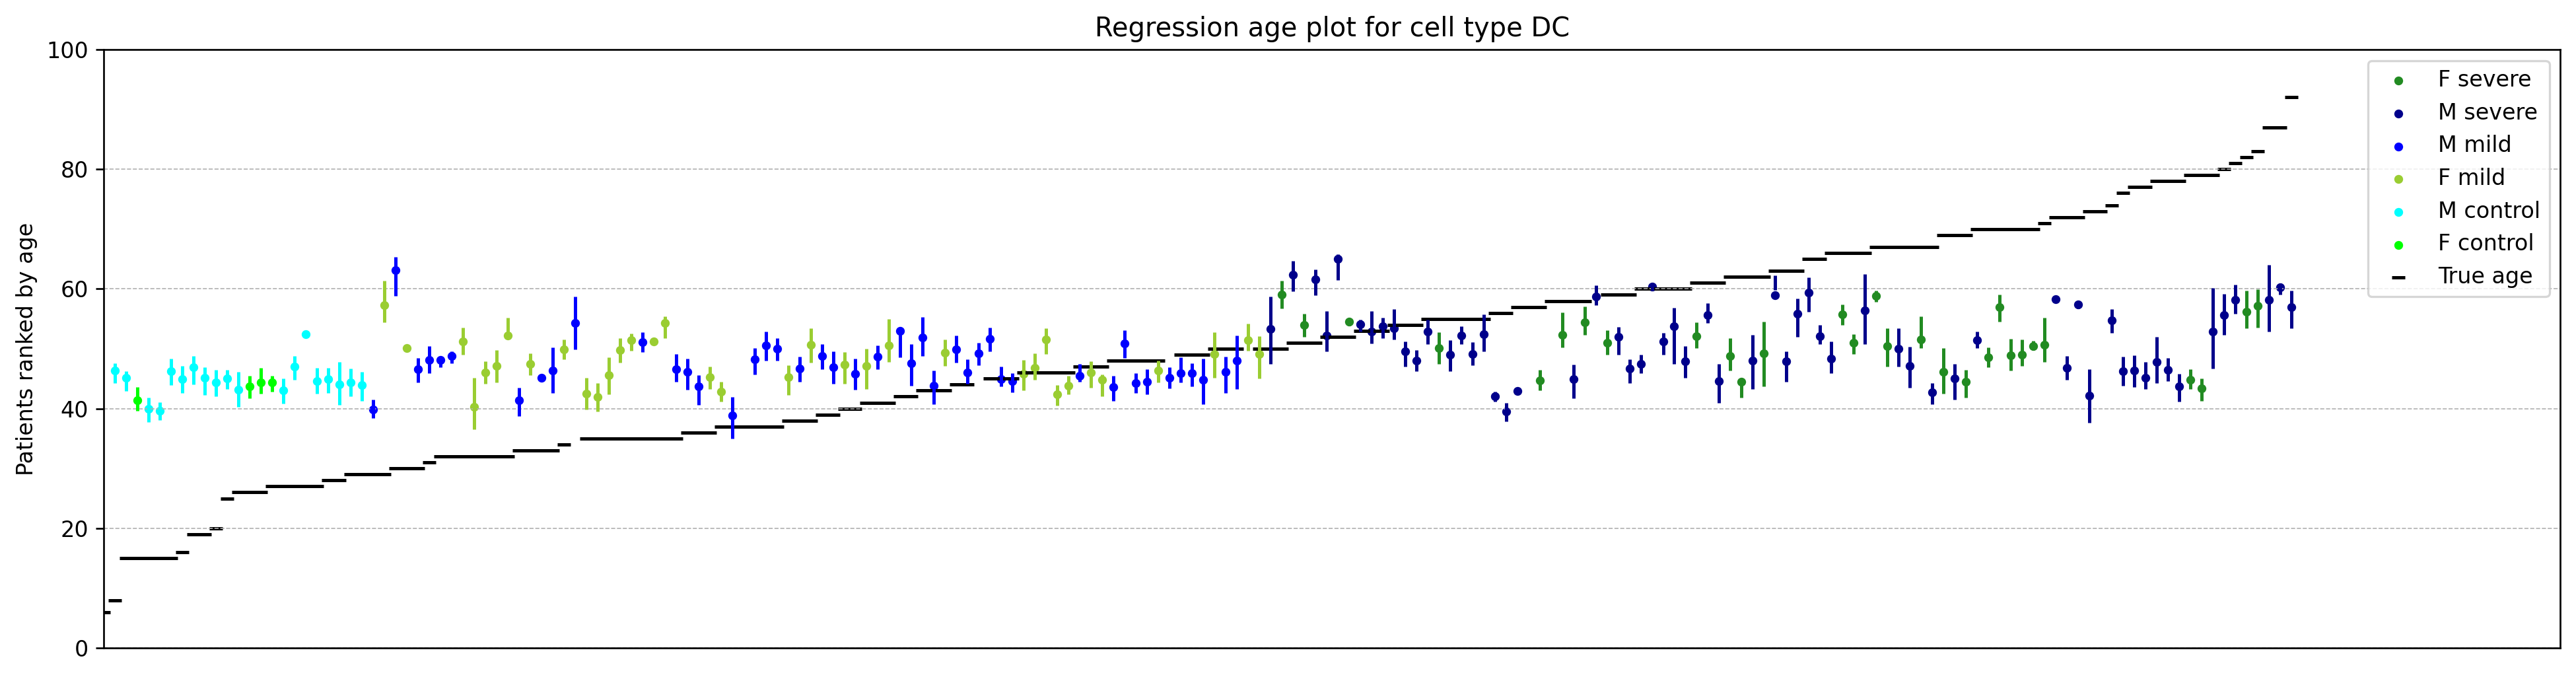

Doing regression for cell type... Mega
number of cells:  13056
number of patients:  179


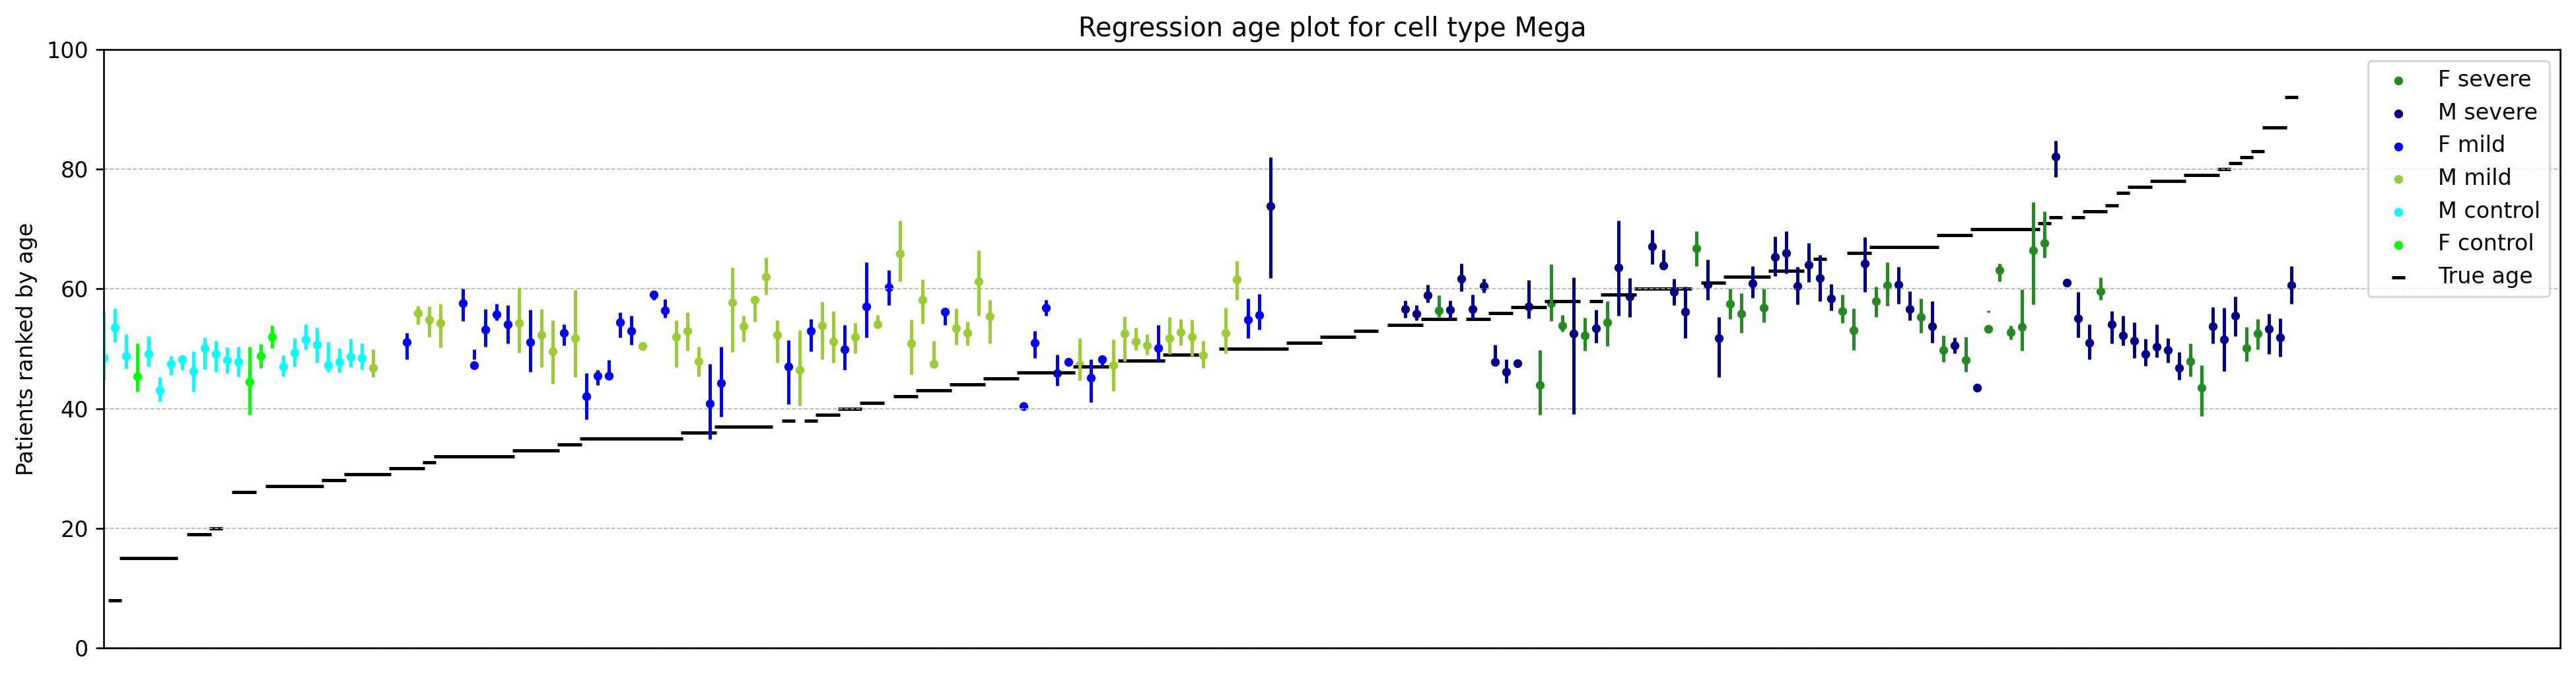

Doing regression for cell type... Neu
number of cells:  3531
number of patients:  126


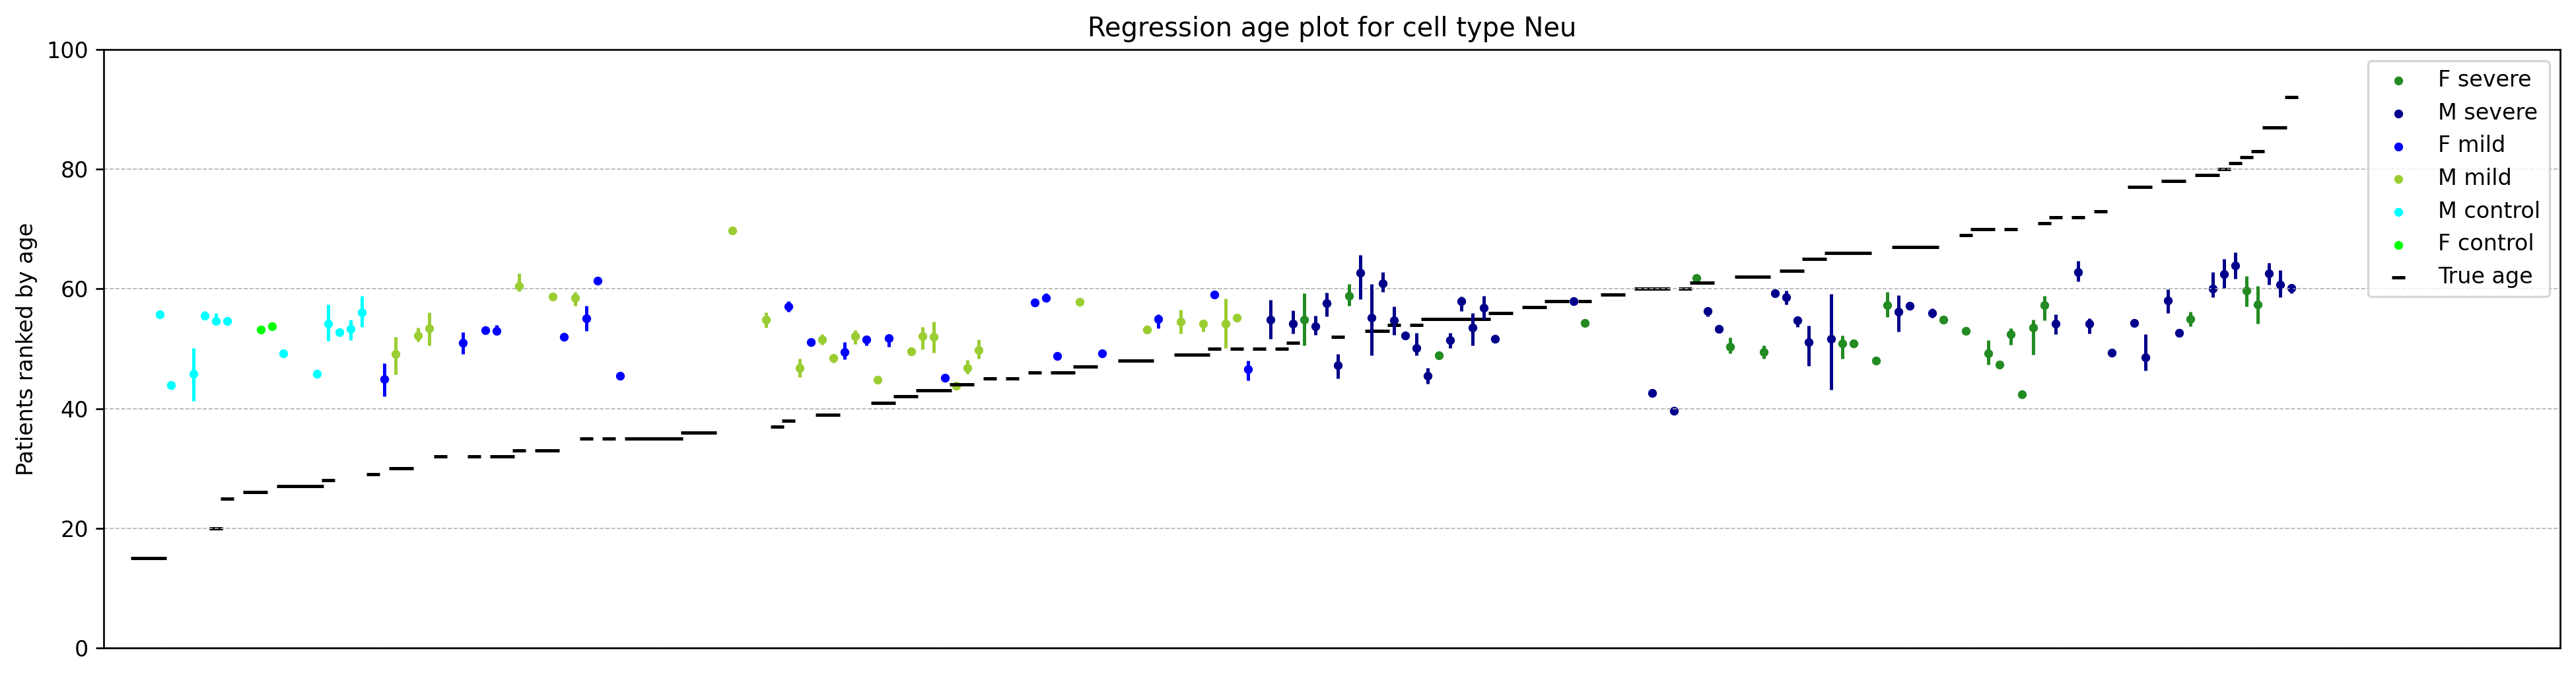

Doing regression for cell type... Plasma
number of cells:  13146
number of patients:  178


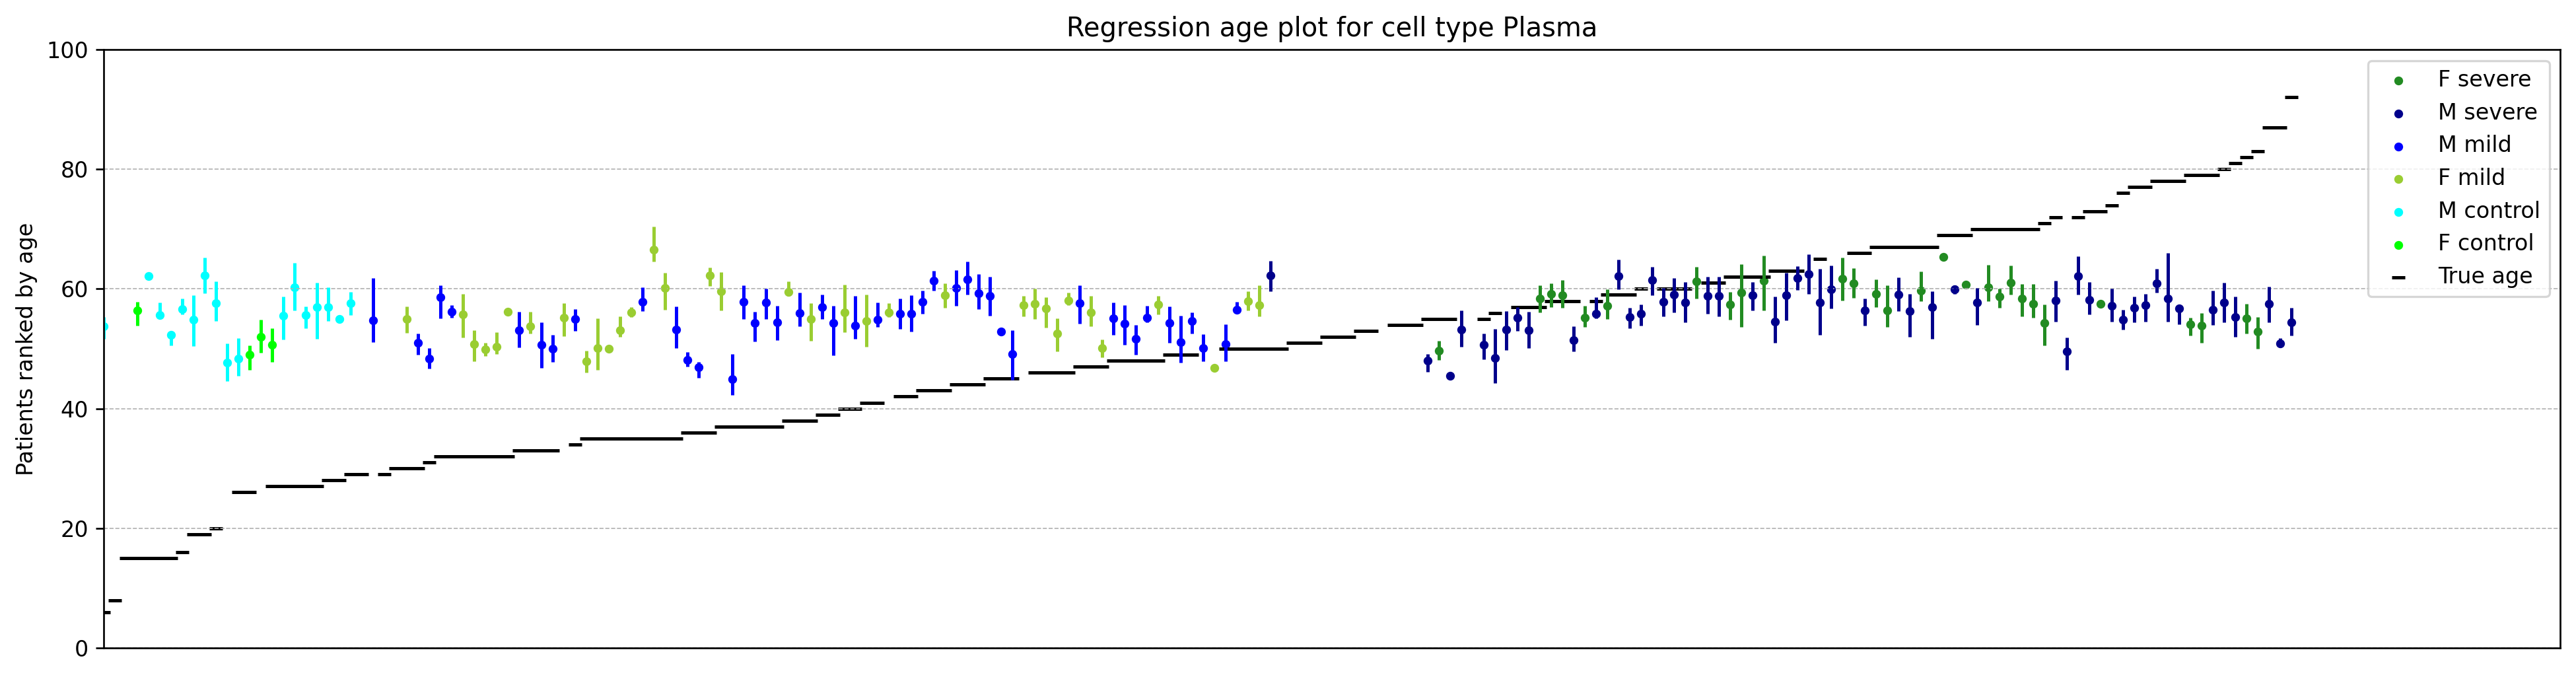

Doing regression for cell type... Epi
number of cells:  5652
number of patients:  23


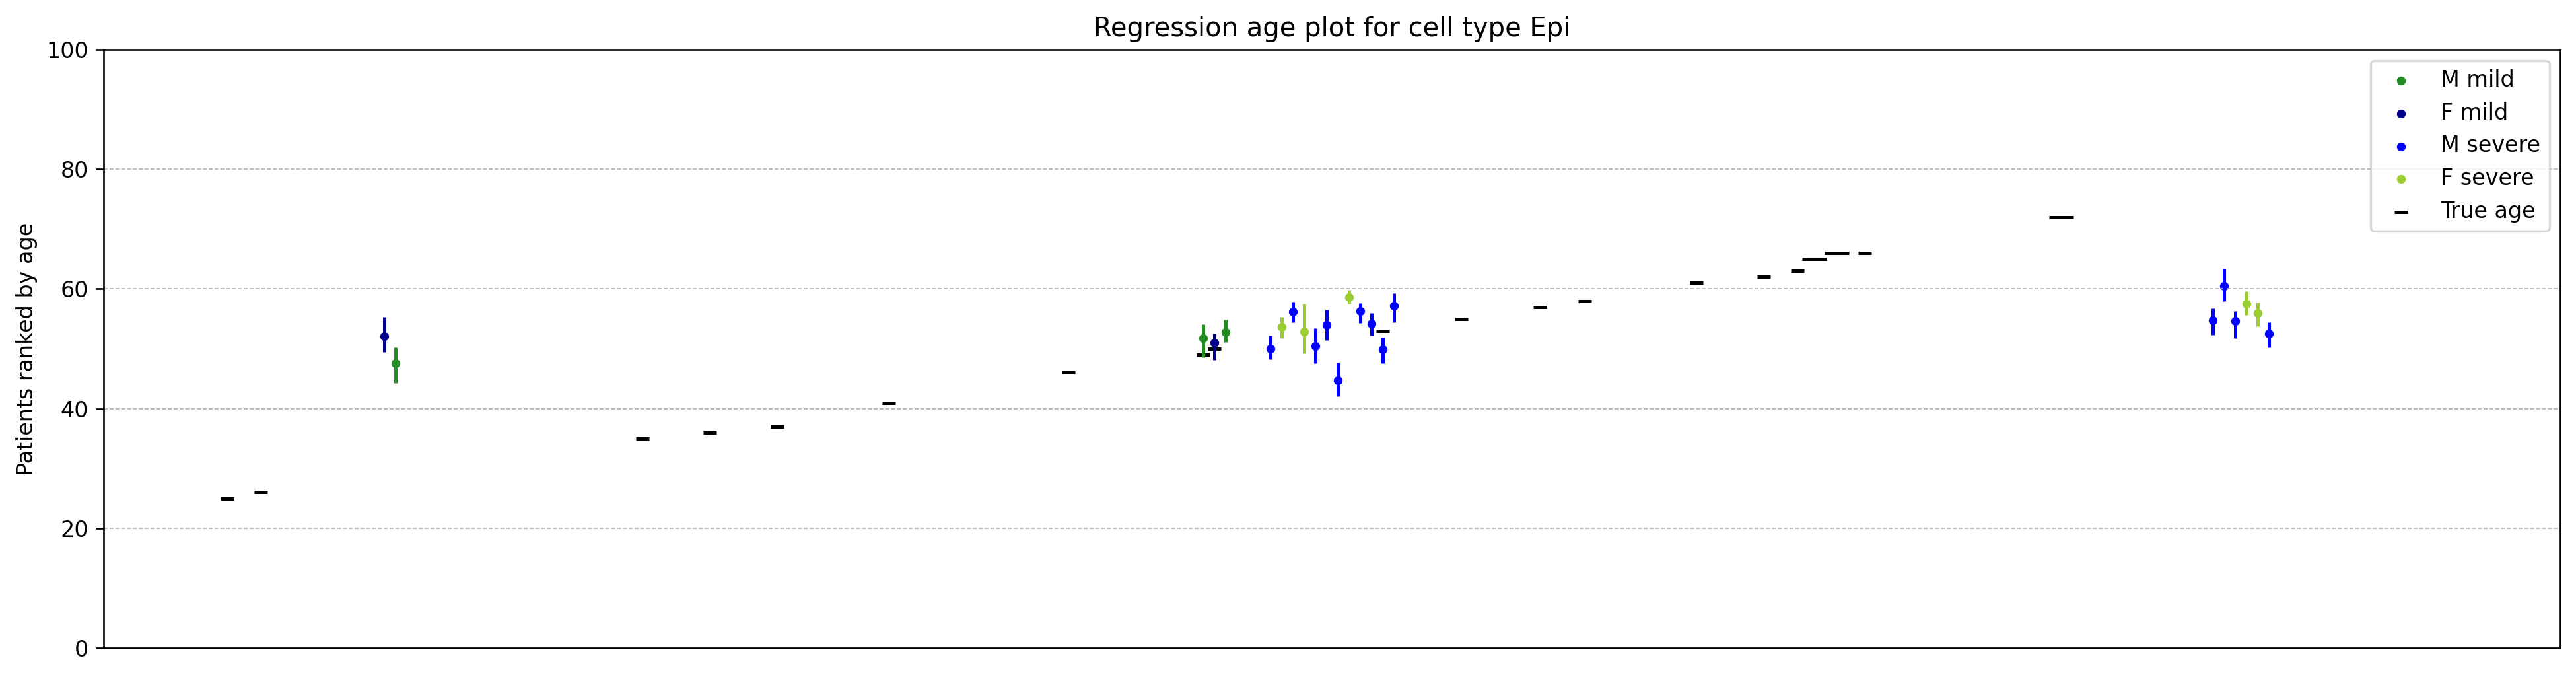

Doing regression for cell type... Mast
number of cells:  17
number of patients:  4


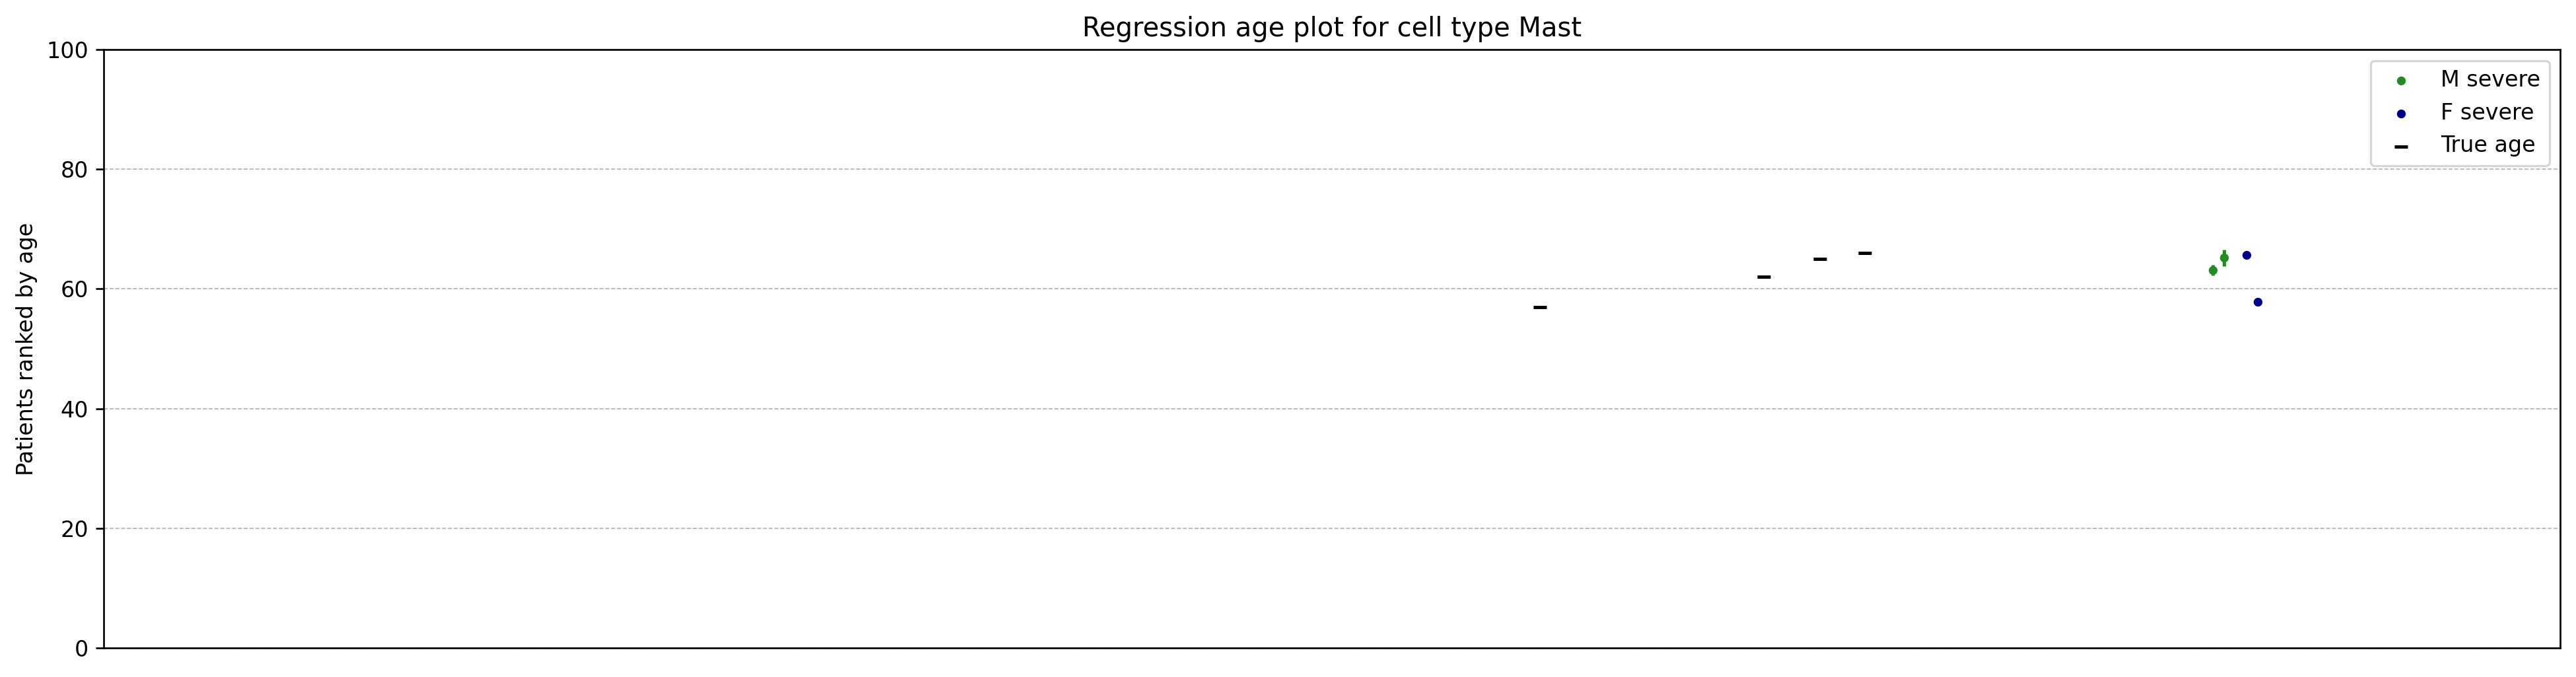

In [440]:
celltypes=obs.cell_type.unique()
for celltype in celltypes:
    print('Doing regression for cell type...', celltype)
    selection_array=obs.cell_type==celltype
    cell_type_obs=obs[selection_array].copy()
    cell_type_latent_df=latent_df[selection_array].copy()
    print('number of cells: ', cell_type_obs.shape[0])
    print('number of patients: ', len(cell_type_obs.patunique.unique()))


    X = cell_type_latent_df.values
    X = sm.add_constant(X)
    y=cell_type_obs['age']

    model = sm.OLS(y, X)
    results=model.fit()
#     results = model.fit_regularized(method='elastic_net', alpha=0.5, L1_wt=0.5, start_params=None, profile_scale=False, refit=False)
#     print(results.summary())

#     print('Subsampling and predicting..')
#     predict_subsample(df=cell_type_obs,prob=0.7, results=results)
    
    prob=0
    subsample = np.random.choice(a=[False, True], size=(len(cell_type_obs), 1), p=[prob, 1-prob])
    subsample = np.squeeze(subsample)
    df=cell_type_obs[subsample].copy()
    df.sex=df.sex.map({'M':'M','F':'F','unknown':'M'})
    df['conditions']=df['sex']+' '+ df['severity'].str.split('/', expand=True)[0] #+ ' ' + obs['sample_point'] + ' ' + obs['outcome']
    df['pred_ages']= results.predict(X[subsample])
    df['real_ages']=y[subsample].values
    
#     print('Plotting...')
    ageplot(df=df, alpha = 0.01, title = 'Regression age plot for cell type ' + celltype, size=(20,5),dpi=120)

# Regularized Regression statified per cell type 
The regression stratified by cell type didn't yield promising results. 
We try doing elastic net regression and see if there is a noticeable improvement.


Doing regression for cell type... Mono
number of cells:  294788
number of patients:  196


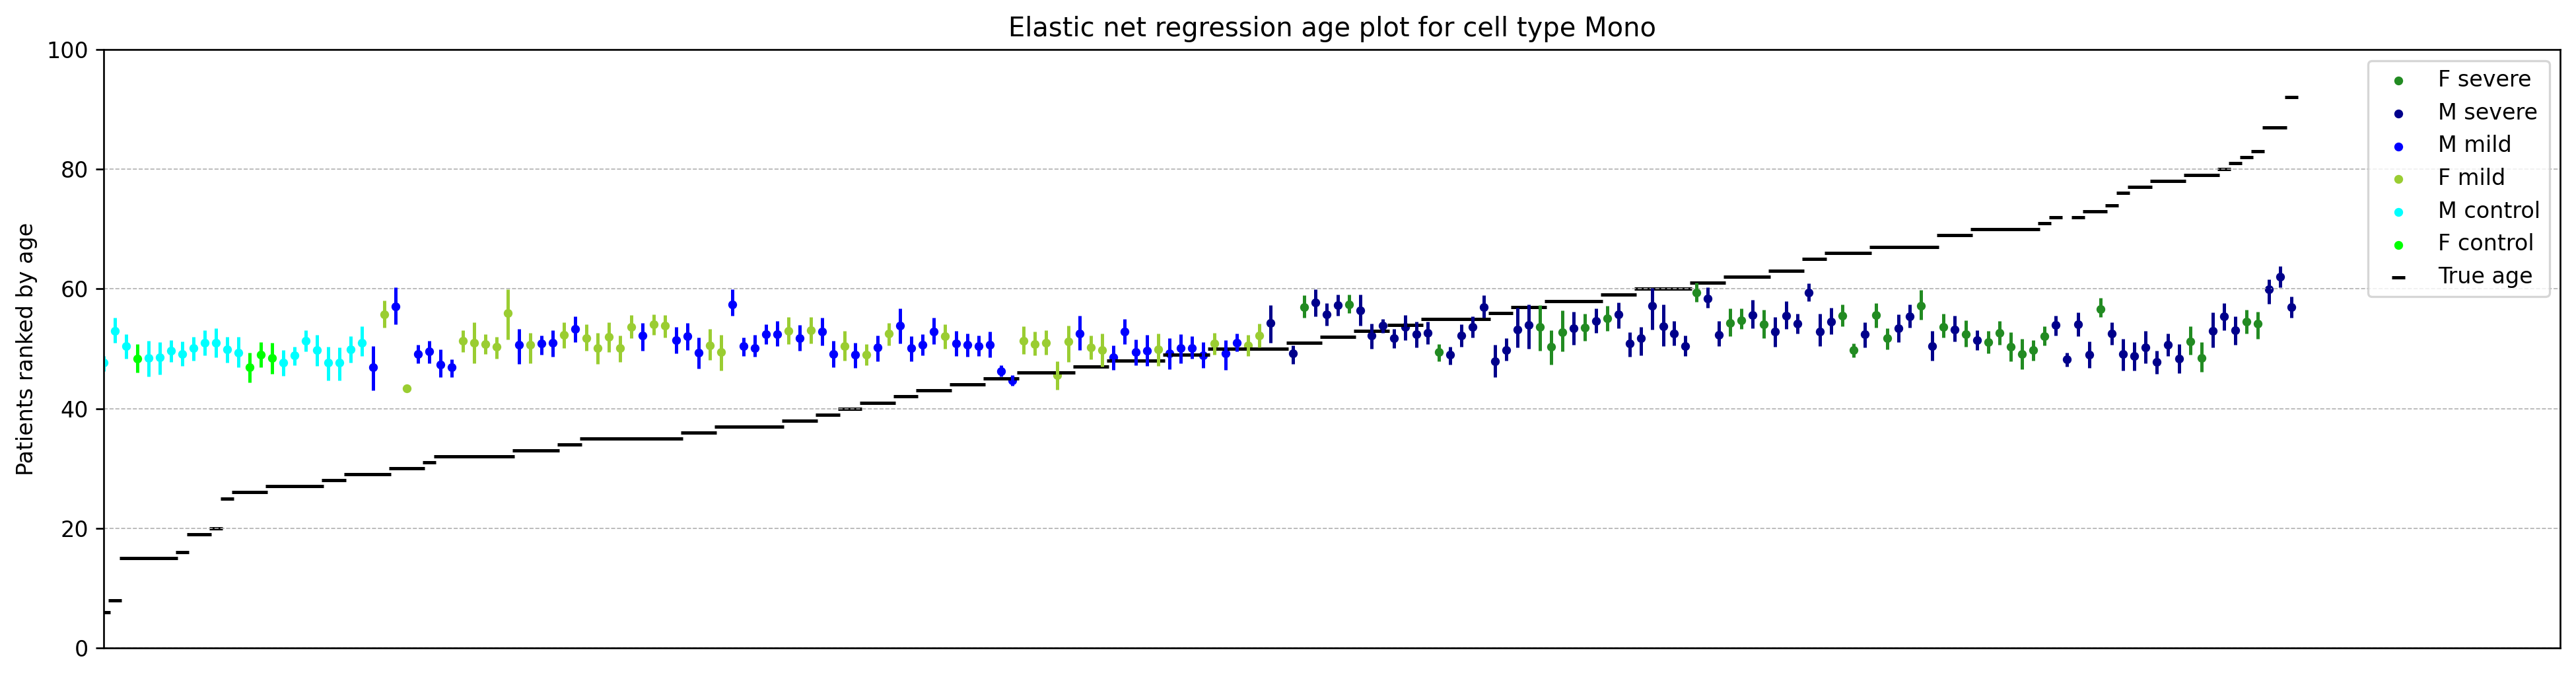

Doing regression for cell type... B
number of cells:  403700
number of patients:  197


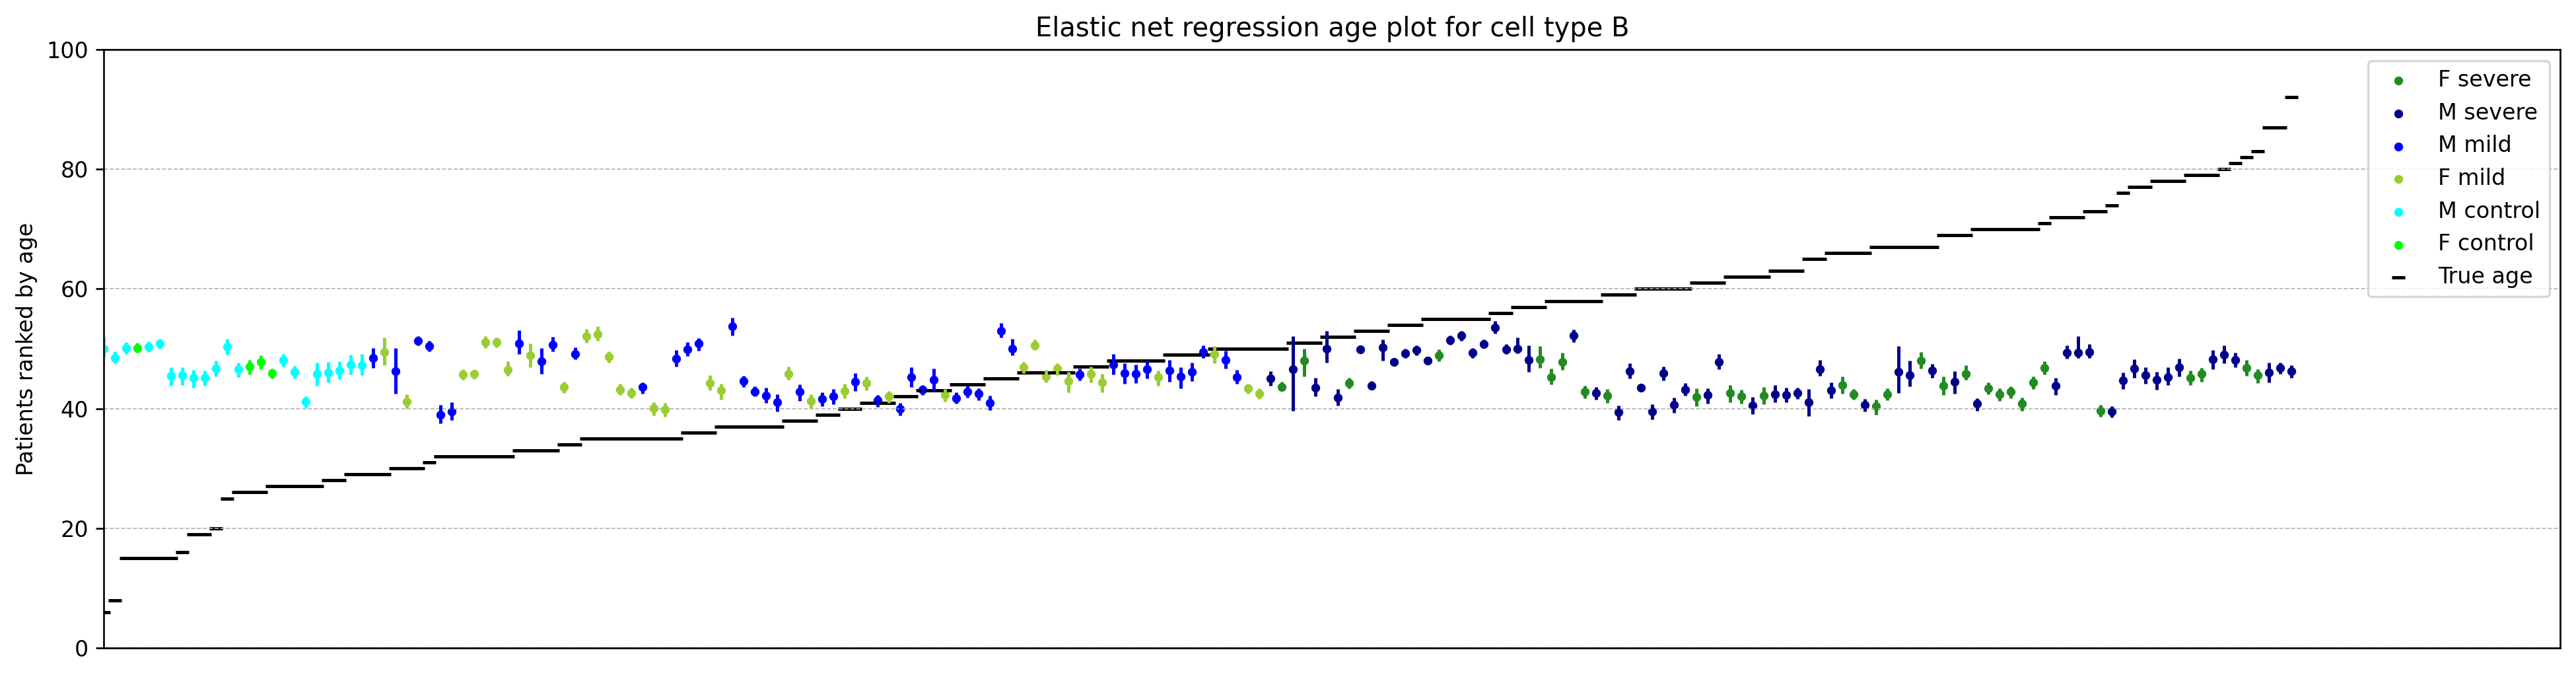

Doing regression for cell type... Macro
number of cells:  21471
number of patients:  124


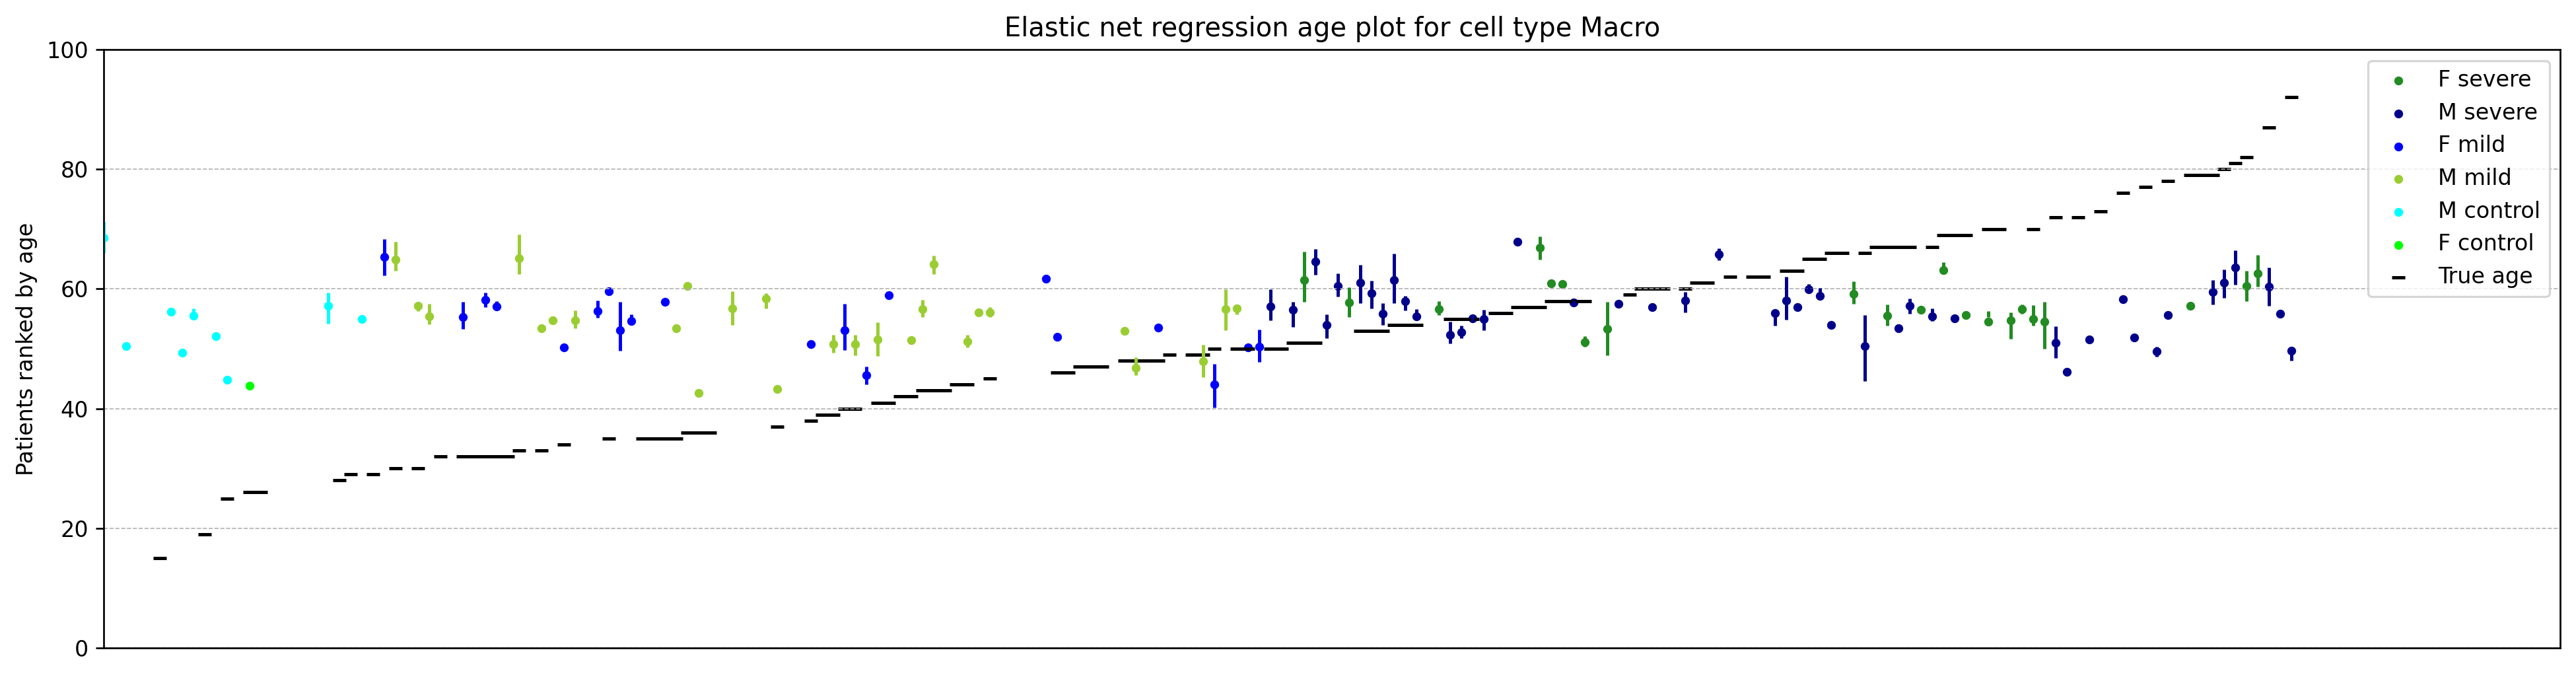

Doing regression for cell type... CD4
number of cells:  260141
number of patients:  196


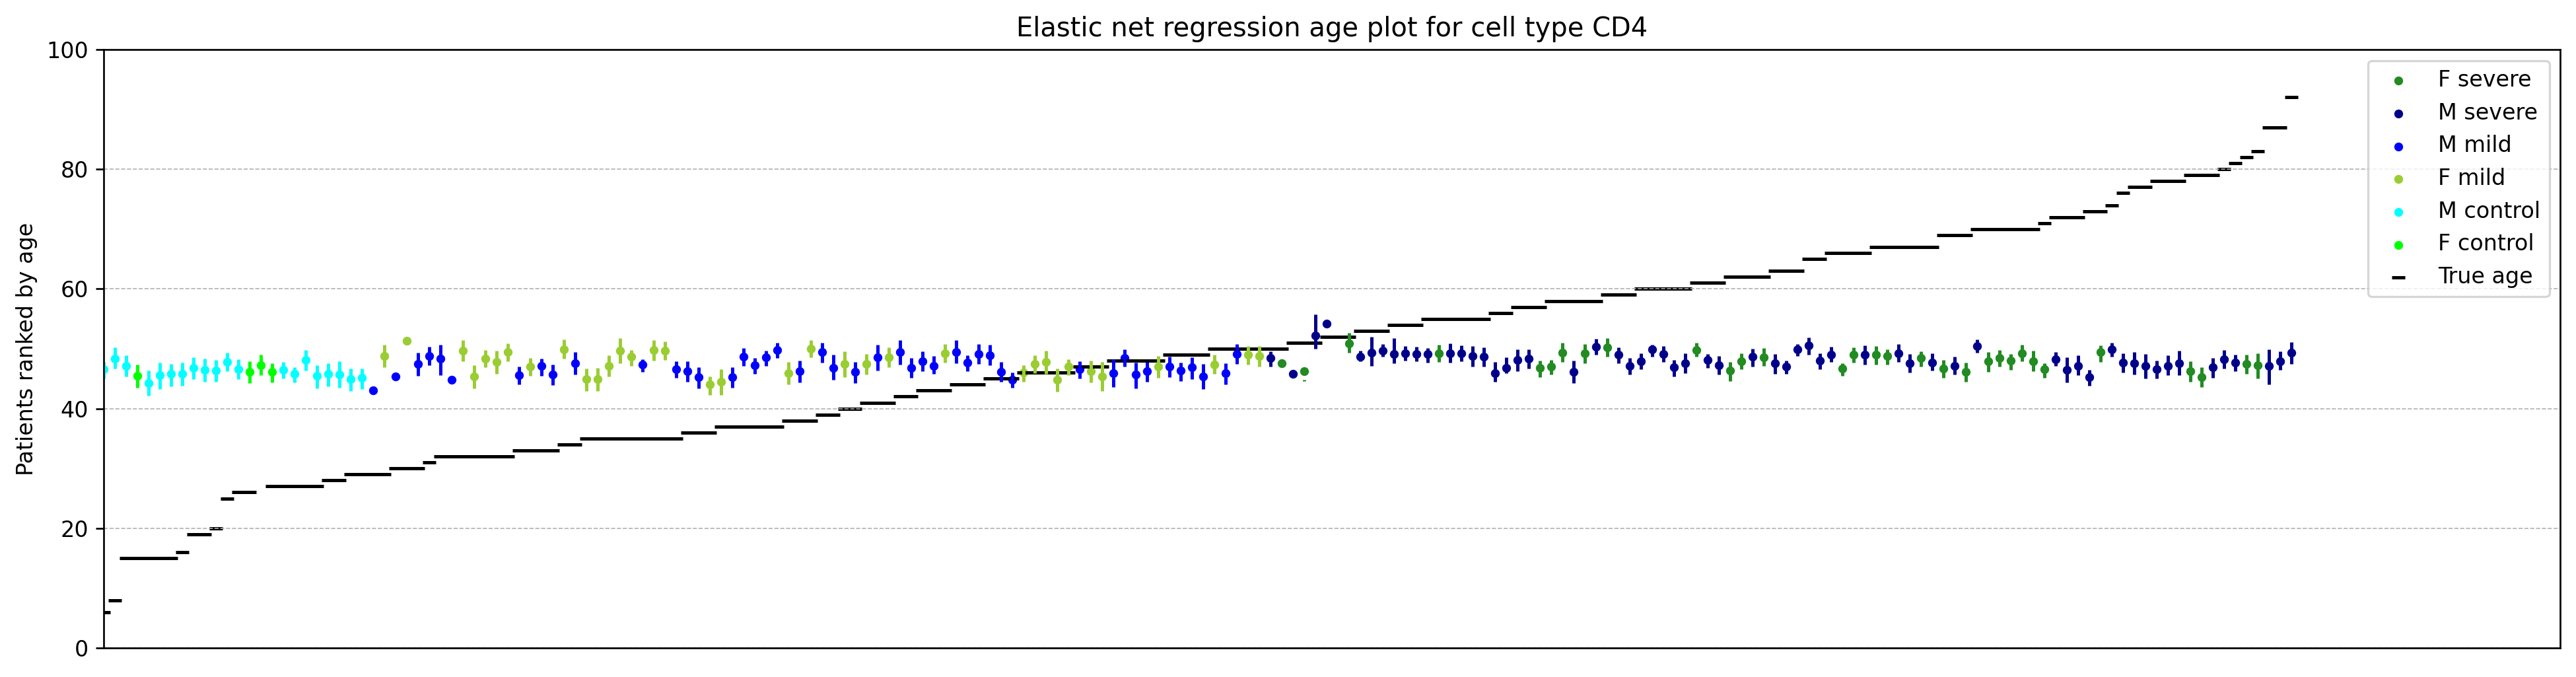

Doing regression for cell type... CD8
number of cells:  374454
number of patients:  197


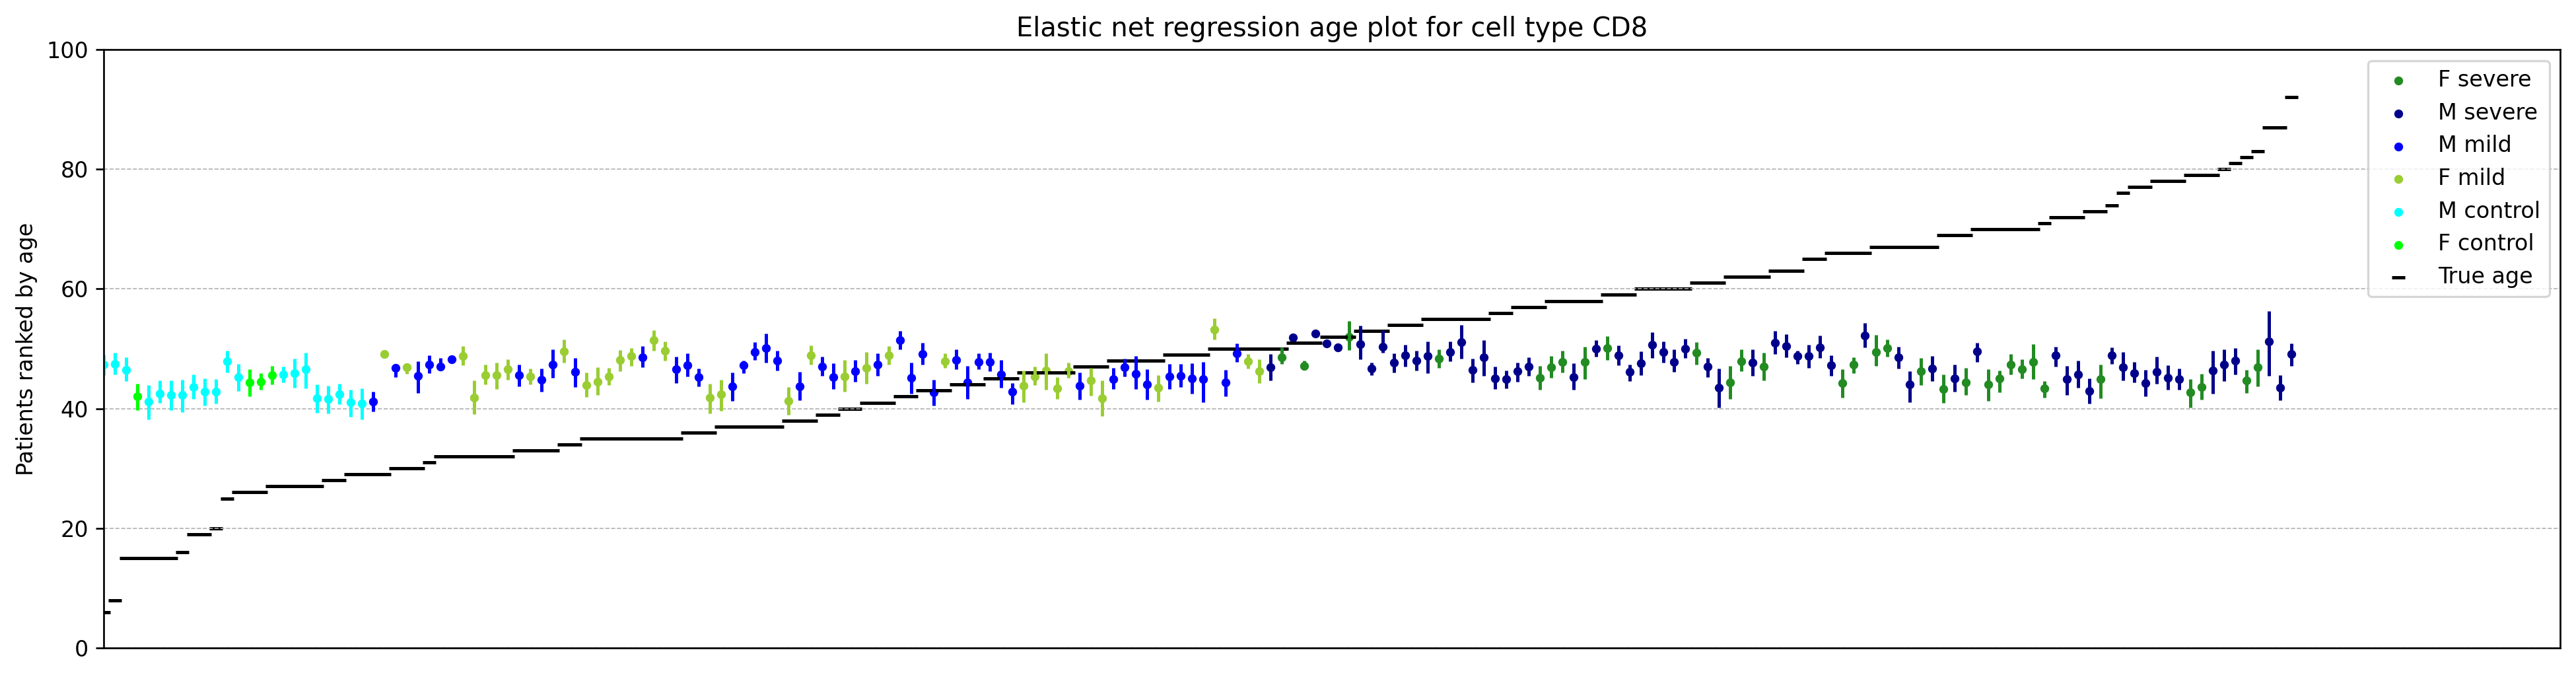

Doing regression for cell type... NK
number of cells:  59062
number of patients:  194


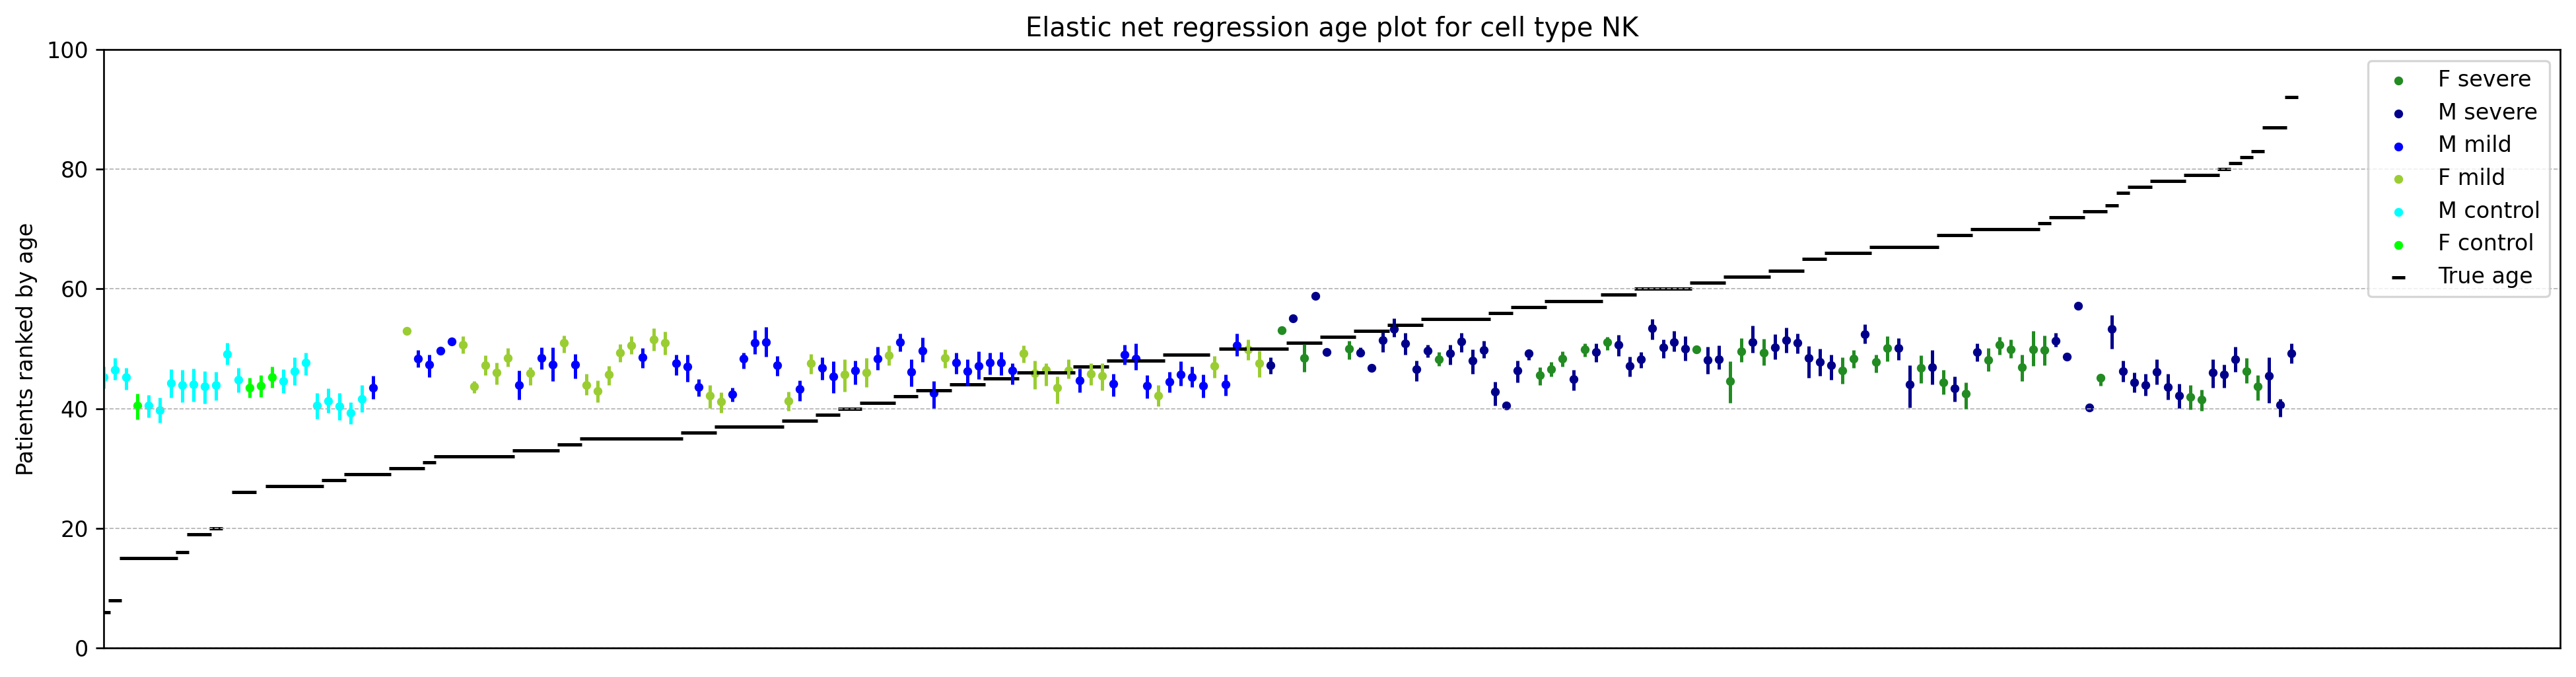

Doing regression for cell type... DC
number of cells:  13684
number of patients:  192


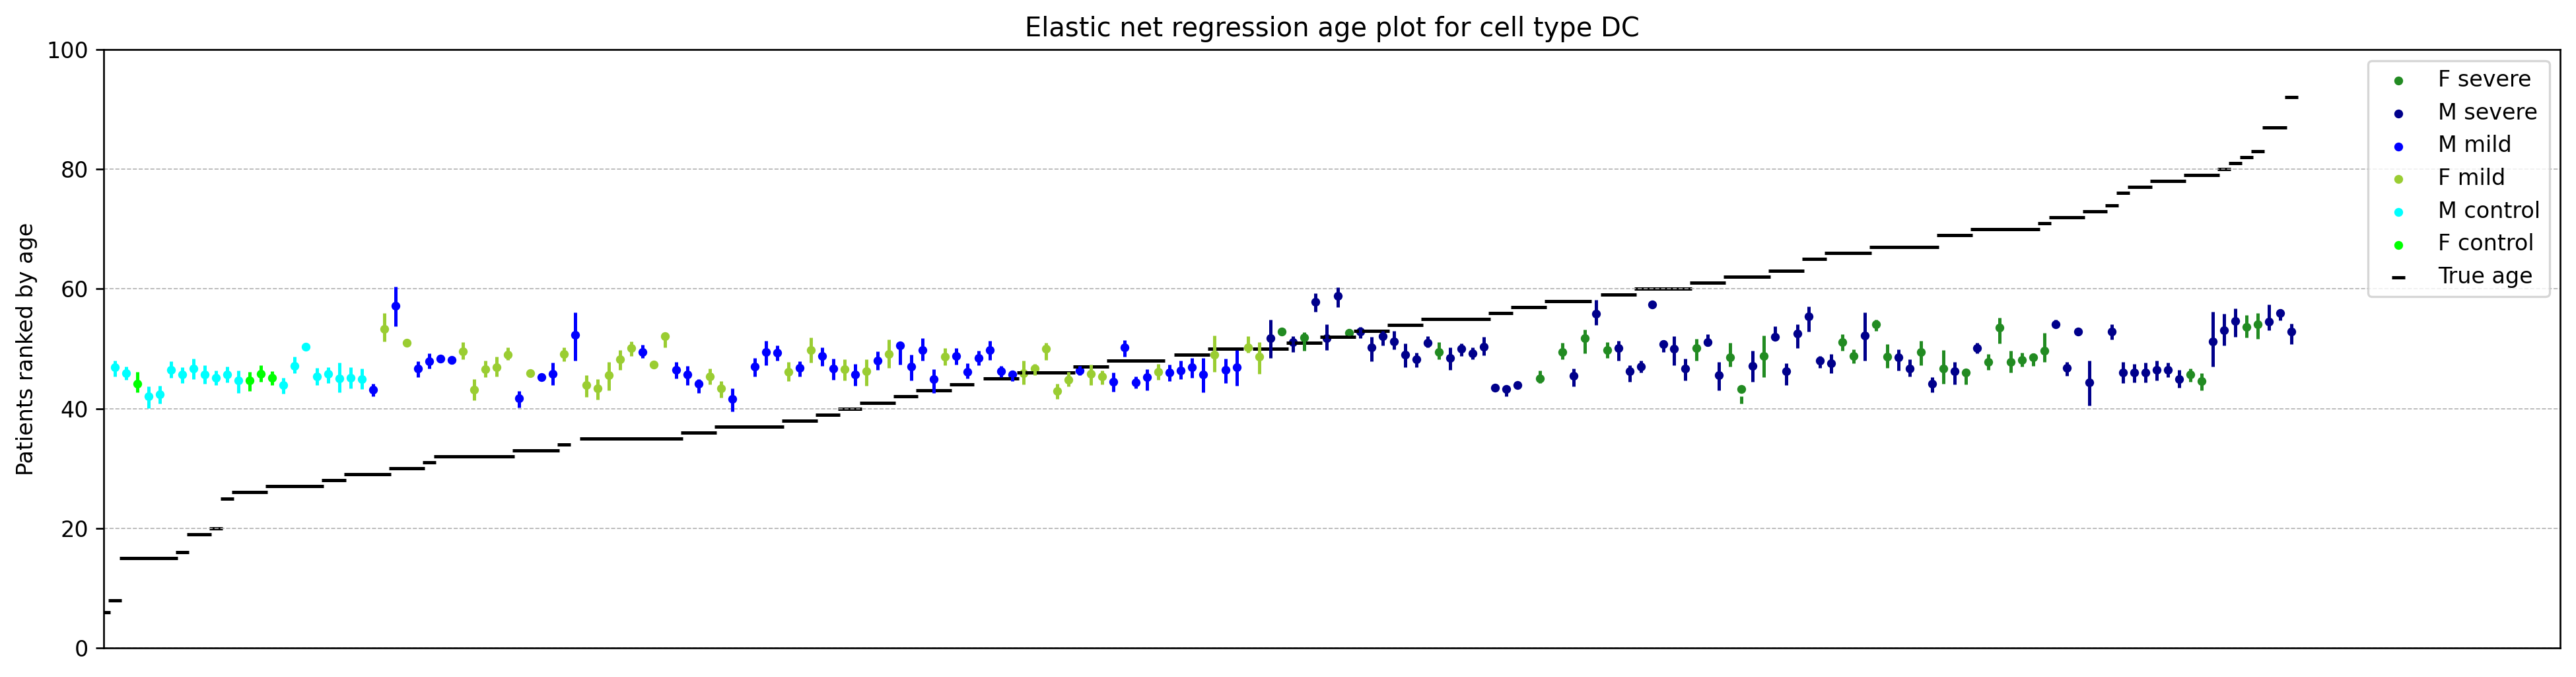

Doing regression for cell type... Mega
number of cells:  13056
number of patients:  179


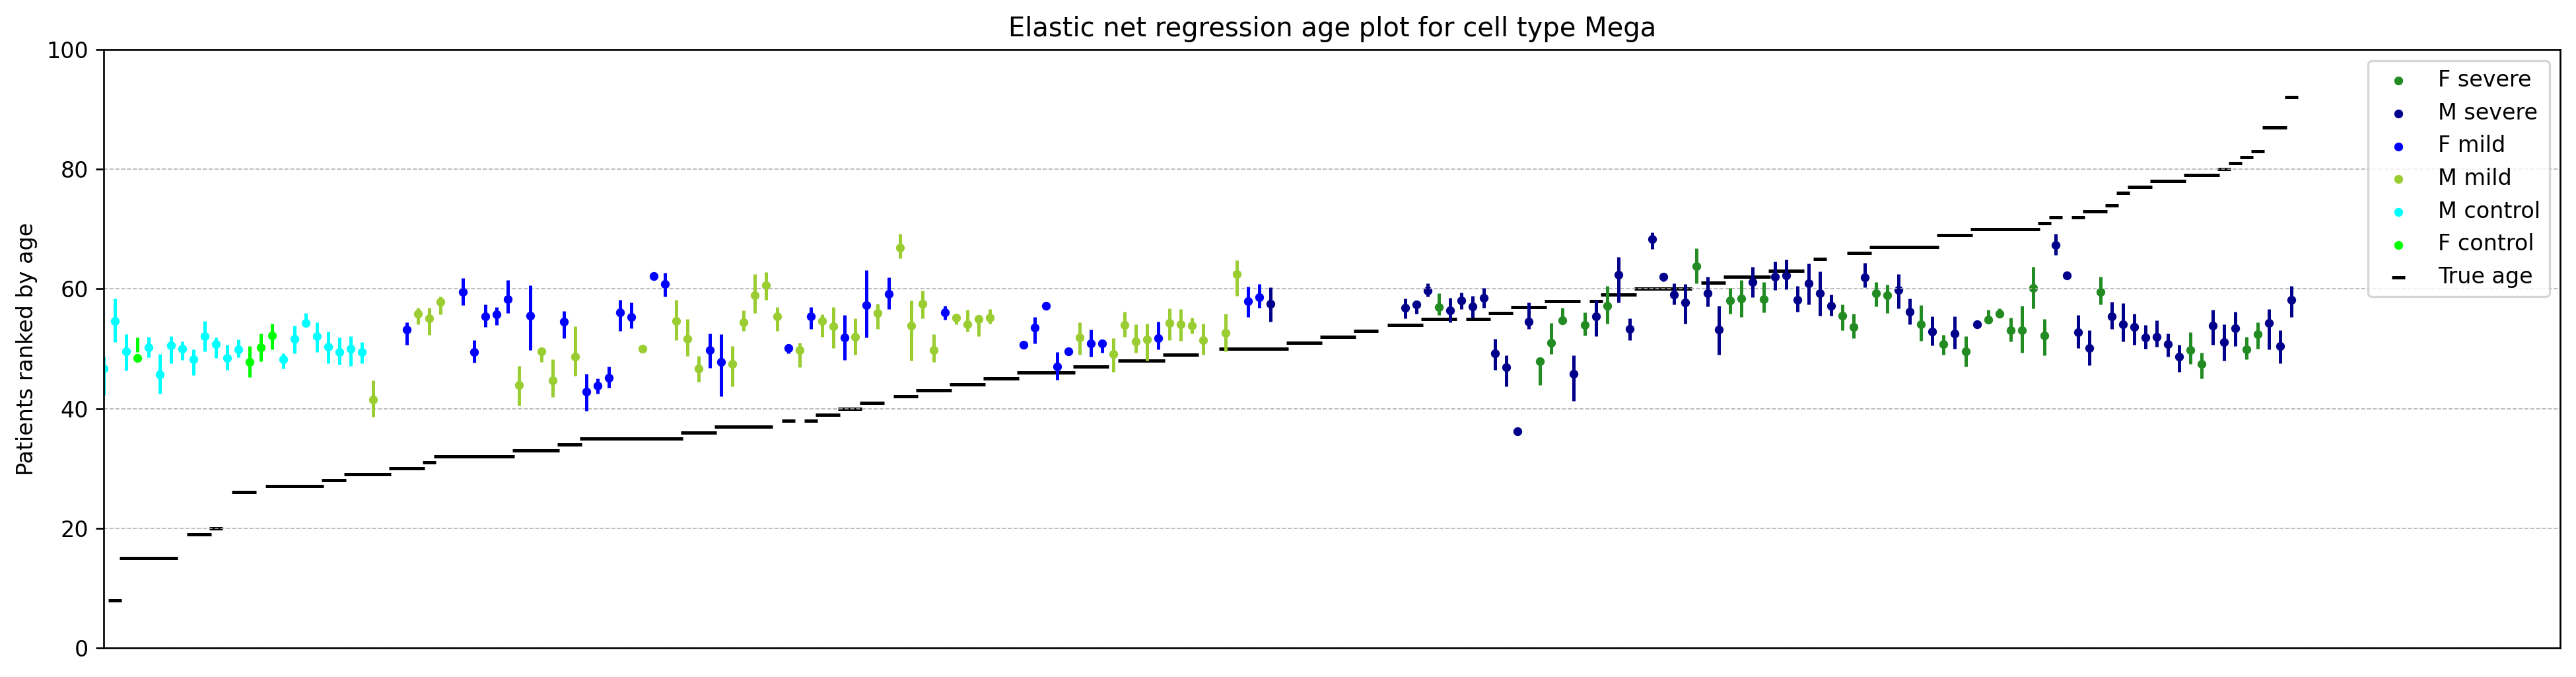

Doing regression for cell type... Neu
number of cells:  3531
number of patients:  126


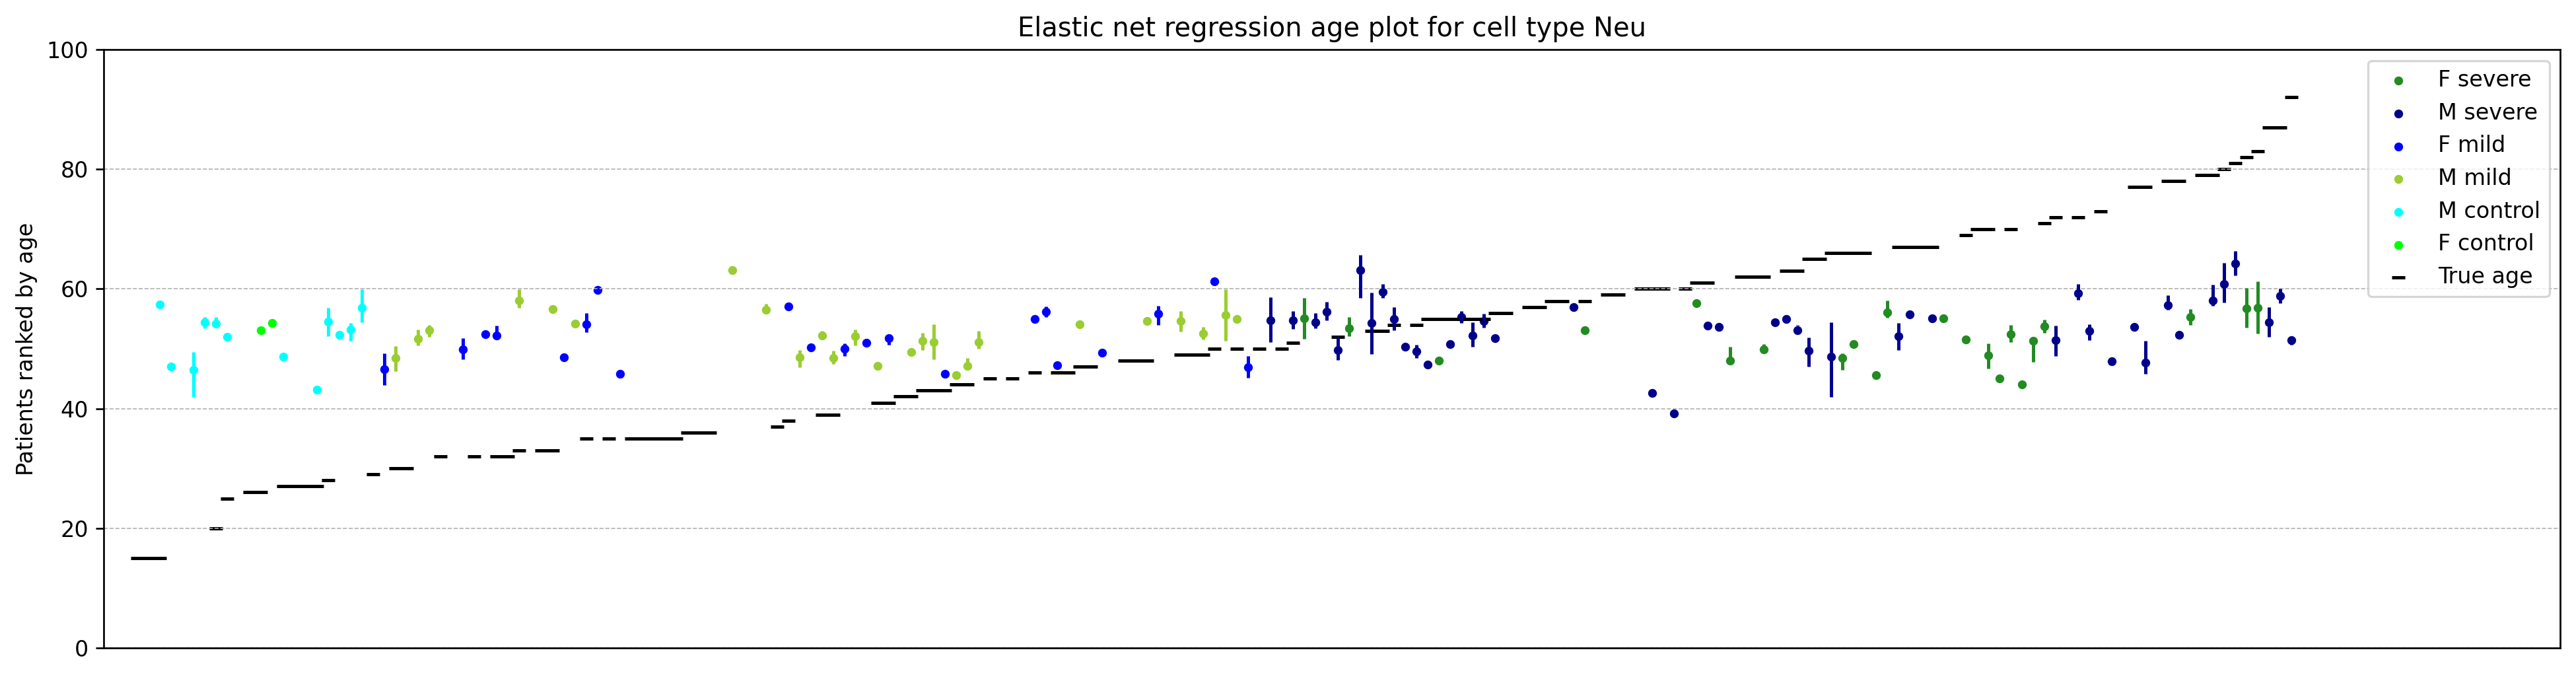

Doing regression for cell type... Plasma
number of cells:  13146
number of patients:  178


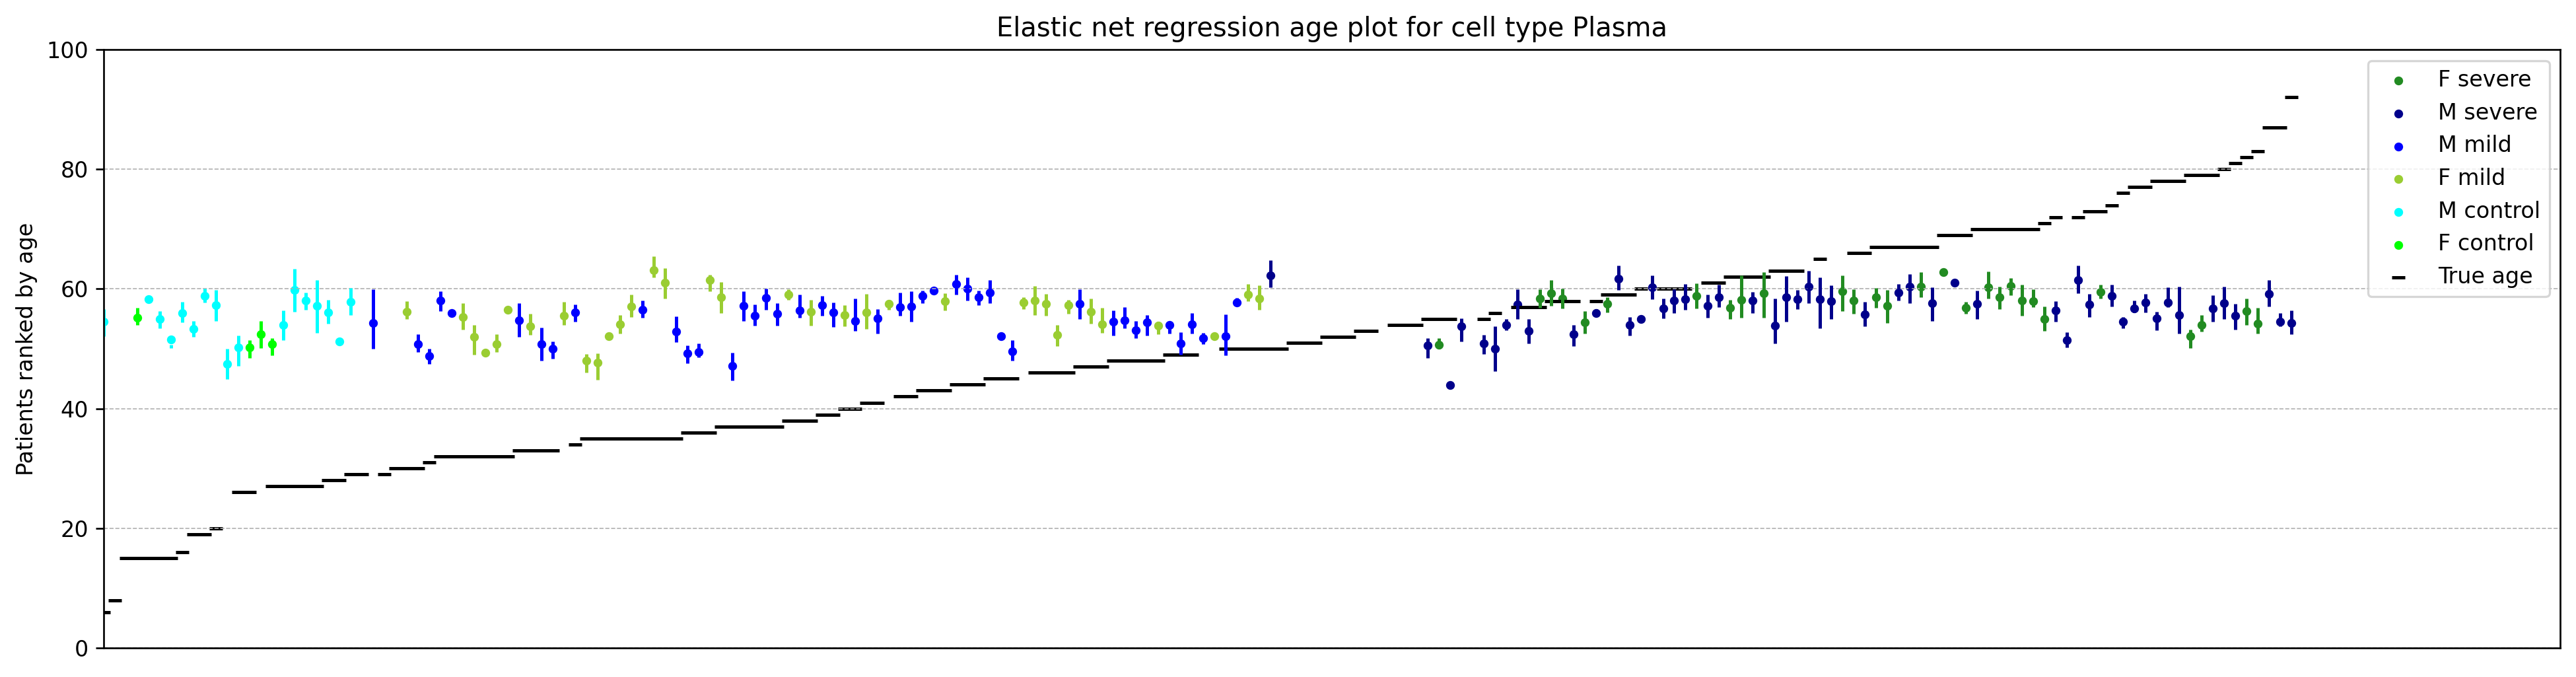

Doing regression for cell type... Epi
number of cells:  5652
number of patients:  23


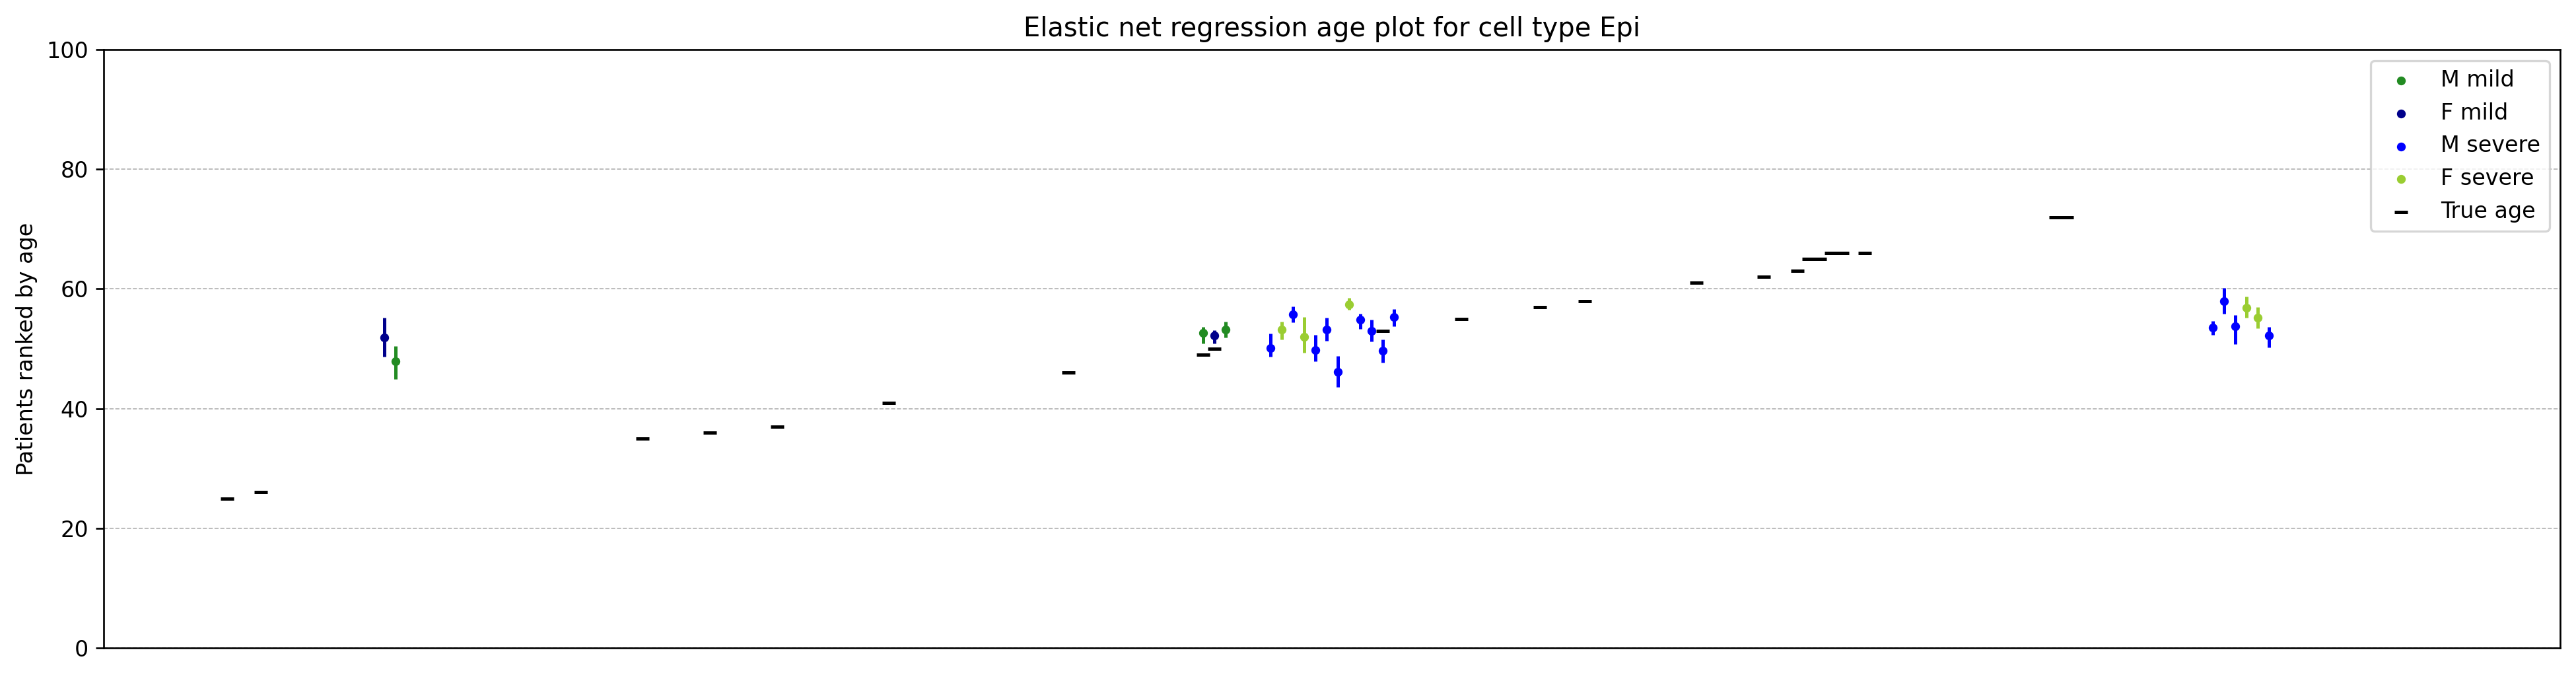

Doing regression for cell type... Mast
number of cells:  17
number of patients:  4


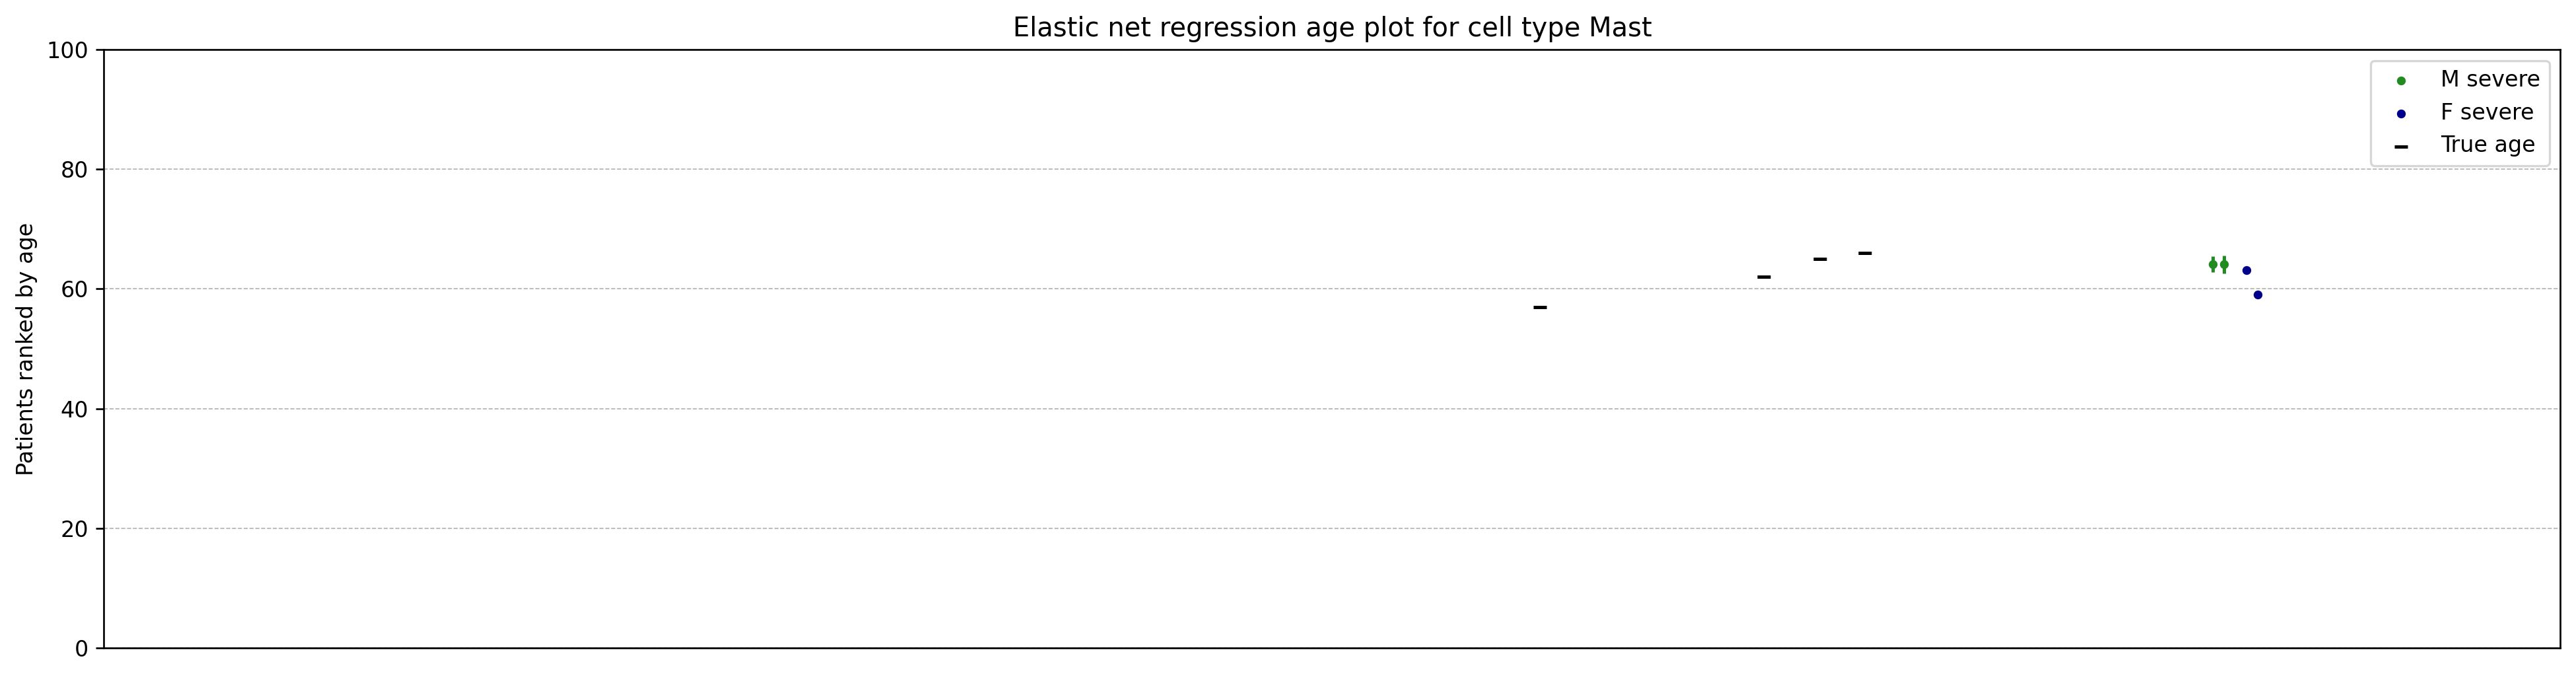

In [442]:
celltypes=obs.cell_type.unique()
for celltype in celltypes:
    print('Doing regression for cell type...', celltype)
    selection_array=obs.cell_type==celltype
    cell_type_obs=obs[selection_array].copy()
    cell_type_latent_df=latent_df[selection_array].copy()
    print('number of cells: ', cell_type_obs.shape[0])
    print('number of patients: ', len(cell_type_obs.patunique.unique()))


    X = cell_type_latent_df.values
    X = sm.add_constant(X)
    y=cell_type_obs['age']

    model = sm.OLS(y, X)
    results=model.fit_regularized(method='elastic_net', alpha=0.5, L1_wt=1.0, start_params=None, profile_scale=False, refit=False)
    prob=0
    subsample = np.random.choice(a=[False, True], size=(len(cell_type_obs), 1), p=[prob, 1-prob])
    subsample = np.squeeze(subsample)
    df=cell_type_obs[subsample].copy()
    df.sex=df.sex.map({'M':'M','F':'F','unknown':'M'})
    df['conditions']=df['sex']+' '+ df['severity'].str.split('/', expand=True)[0] #+ ' ' + obs['sample_point'] + ' ' + obs['outcome']
    df['pred_ages']= results.predict(X[subsample])
    df['real_ages']=y[subsample].values
    
#     print('Plotting...')
    ageplot(df=df, alpha = 0.01, title = 'Elastic net regression age plot for cell type ' + celltype, size=(20,5),dpi=120)